# Prediction of United States' Counties Poverty Rates
Mark Vervuurt <br>
19-01-2018

## Executive Summary

This document presents the results of the regression analysis to predict poverty rates of United States' Counties. 

A regression model which uses an AdaBoostRegressor was created. This AdaBoostRegressor is able to predict United States' Counties poverty rates with an RMSE of 2.8506. The following features were key in predicting poverty_rates: 

| Model           | RMSE 
|:----------------|:------
|AdaBoostRegressor|  2.8506
|Linear Regression|  2.9297


| Key Features                                      | Short Description 
|:--------------------------------------------------|:-
|area__urban_influence                              | todo
|econ__economic_typology                            | todo
|econ__pct_civilian_labor                           |  todo
|econ__pct_unemployment                             |  todo
|econ__pct_uninsured_adults                         |  todo
|demo__pct_adults_less_than_a_high_school_diploma   |  todo
|demo__pct_adults_with_high_school_diploma          |  todo
|demo__pct_adults_with_some_college                 |  todo
|demo__pct_adults_bachelors_or_higher               |  todo
|health__pct_adult_obesity                          |  todo
|health__pct_adult_smoking                          |  todo
|health__pct_diabetes                               |  todo
|health__pct_low_birthweight                        |  todo
|health__pct_excessive_drinking                     |  todo
|health__pct_physical_inacticity                    |  todo
|health__homicides_per_100k                         |  todo
|health__motor_vehicle_crash_deaths_per_100k        |  todo
|young_age_rucc_cat                                 | todo
|old_age_rucc_cat                                   | todo
|birth_rate_cat                                     | todo
|death_rate_cat                                     | todo
|hispanic_cat                                       | todo
|african_cat                                        | todo
|white_cat                                          | todo
|native_cat                                         | todo
|asian_cat                                          | todo
|h_dentist_cat                                      | todo

The CRISP-DM Methodology was used in order to create an accurate regression model:

- __Business Understanding__: read through the '[Rural Poverty & Well-being](https://www.ers.usda.gov/topics/rural-economy-population/rural-poverty-well-being/poverty-overview.aspx)' report to better understand the circumstances of poverty.
- __Data Understanding__: explore the quantitative and categorical variables that play a key role in predicting poverty rates. 
- __Data Preparation__: drop unnecessary features, create better features, fill missing values, etc.
- __Modeling__: create and select the best regression model.
- __Evaluation__: evaluate the regression models using nested cross validation.
- __Deployment__: the deployment of the regression model is not strictly applicable here. However presenting the results of the regression analysis with this report can be considered as the deployment step.

## Business Understanding
As described in the online report the '[Rural Poverty & Well-being](https://www.ers.usda.gov/topics/rural-economy-population/rural-poverty-well-being/poverty-overview.aspx)': "Concentrated poverty contributes to poor housing and health conditions, higher crime and school dropout rates, as well as employment dislocations". With this information we will try to construct features around poor housing, health conditions, higher crime and school drop out rates based on the data we have.

Another important feature of poverty is time. An area that doesn't have a high level of poverty in two following years is likely better off than an area that has a high level of poverty in both years. It will be hard to construct a feature of this because we cannot compare the state's poverty rate over year 'a' and 'b' with this data set. We dont have a unique key to identify counties.

Counties are generally compared by their Non-Metro and Metro status. There is more poverty in Non-Metro areas than Metro areas. Poverty is also higher under certain ages and etnicities. Here also we will try to construct features out of this information.

In [1]:
import re
import bs4
import time
import plyfile
import html5lib
import multiprocessing

import numpy as np
import pandas as pd

from scipy import misc
import scipy.io.wavfile as wavfile

import scipy
from math import sqrt
from scipy import stats
from pprint import pprint
from sklearn import tree
from sklearn.svm import SVC
from sklearn import manifold
from tempfile import mkdtemp
from textwrap import wrap
from matplotlib import cm as cm

import sklearn.metrics as metrics
from pandas.plotting import scatter_matrix
from scipy.stats import randint as sp_randint
from sklearn.pipeline import TransformerMixin
from sklearn.metrics.scorer import make_scorer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Binarizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFECV, SelectFromModel, f_regression, SelectKBest
from sklearn.ensemble import RandomForestClassifier, AdaBoostRegressor, AdaBoostClassifier
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, Lasso, Ridge
from sklearn.preprocessing import MaxAbsScaler, MinMaxScaler, Normalizer, RobustScaler, StandardScaler
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix, roc_curve, roc_auc_score, mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, cross_validate, cross_val_predict, KFold, ShuffleSplit, StratifiedShuffleSplit

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm as cm
from mpl_toolkits.mplot3d import Axes3D
from pandas.plotting import parallel_coordinates, andrews_curves

%matplotlib inline
matplotlib.style.use('ggplot')

pd.set_option('display.max_columns', None)

## Data Understanding
In order to build this regression model and determine its most significant features a thorough data exploration was done to understand the relationship between poverty rates and other features.
### Initial Data Exploration
The dataset consists of 3198 records about United States' counties. Each record contains socioeconomic indicators about a United States' county for a given year. Besides the 'row_id', 'yr' and the target value 'poverty_rate', the dataset contains 32 features about socioeconomic indicators.

In [2]:
poverty_train = pd.read_csv('./Microsoft_-_DAT102x_Predicting_Poverty_in_the_United_States_-_Training_values.csv')

In [3]:
poverty_train.shape

(3198, 34)

In [4]:
poverty_train.dtypes

row_id                                                int64
area__rucc                                           object
area__urban_influence                                object
econ__economic_typology                              object
econ__pct_civilian_labor                            float64
econ__pct_unemployment                              float64
econ__pct_uninsured_adults                          float64
econ__pct_uninsured_children                        float64
demo__pct_female                                    float64
demo__pct_below_18_years_of_age                     float64
demo__pct_aged_65_years_and_older                   float64
demo__pct_hispanic                                  float64
demo__pct_non_hispanic_african_american             float64
demo__pct_non_hispanic_white                        float64
demo__pct_american_indian_or_alaskan_native         float64
demo__pct_asian                                     float64
demo__pct_adults_less_than_a_high_school

#### Individual Feature Statistics
Here are the summary statistics for all the socioeconomic features:
- summary statistics of categorical variables: the total count (count), number of unique elements (unique), most frequent element (top) and the frequency of the most frequent element (frequent)
- summary statistics of quantitative variables: the mean, the standard deviation (std), the minimum value (min), 25% percentile, 50% percentile (median), 75% percentile and the maximum value (max).

In [5]:
poverty_train.drop(columns=['row_id'], axis=1).describe(include='all')

area__rucc  \
count                                                3198   
unique                                                  9   
top     Nonmetro - Urban population of 2,500 to 19,999...   
freq                                                  608   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                    area__urban_influence  \
count                                                3198   
unique                                                 12   
top     Small-in a metro area with fewer than 1 millio...   
freq                                                  692   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

       econ__economic_typology  econ__pct_civilian_labor  \
count                     3198               3198.000000   
unique                       6                       NaN   
top             Nonspecialized                       NaN   
freq                      1266                       NaN   
mean                       NaN                  0.467071   
std                        NaN                  0.074541   
min                        NaN                  0.217000   
25%                        NaN                  0.420000   
50%                        NaN                  0.467000   
75%                        NaN                  0.514000   
max                        NaN                  1.000000   

        econ__pct_unemployment  econ__pct_uninsured_adults  \
count               3198.00000                 3196.000000   
unique                     NaN                         NaN   
top                        NaN                         NaN   
freq                       NaN                         NaN   
mean                   0.05961                    0.217534   
std                    0.02285                    0.067372   
min                    0.00800                    0.046000   
25%                    0.04400                    0.166000   
50%                    0.05700                    0.216000   
75%                    0.07100                    0.262000   
max                    0.24000                    0.495000   

        econ__pct_uninsured_children  demo__pct_female  \
count                    3196.000000       3196.000000   
unique                           NaN               NaN   
top                              NaN               NaN   
freq                             NaN               NaN   
mean                        0.085920          0.498781   
std                         0.040005          0.024251   
min                         0.009000          0.294000   
25%                         0.057000          0.493000   
50%                         0.077000          0.503000   
75%                         0.105000          0.512000   
max                         0.285000          0.576000   

        demo__pct_below_18_years_of_age  demo__pct_aged_65_years_and_older  \
count                       3196.000000                        3196.000000   
unique                              NaN                                NaN   
top                                 NaN                                NaN   
freq                                NaN                                NaN   
mean                        

In [6]:
poverty_labels = pd.read_csv('Microsoft_-_DAT102x_Predicting_Poverty_in_the_United_States_-_Training_labels.csv')

In [7]:
poverty_labels.shape

(3198, 2)

In [8]:
poverty_labels.dtypes

row_id            int64
poverty_rate    float64
dtype: object

Here are the summary statistics for the target variable which is quantitative:

In [9]:
poverty_labels.drop(columns=['row_id'], axis=1).describe()

poverty_rate
count   3198.000000
mean      16.817136
std        6.697969
min        2.500000
25%       12.000000
50%       15.800000
75%       20.300000
max       47.400000

Poverty rates are right or positively skewed with a skew value of 1.048357. We can recognize a slight bell curve in the data. The mean and median are relatively close to each other and the standard deviation is relatively low which indicates low variability in the poverty rates. Most United States' counties have a poverty_rate between 10% and 20%.

In [10]:
poverty_labels.drop(columns=['row_id'], axis=1).skew()

poverty_rate    1.048357
dtype: float64

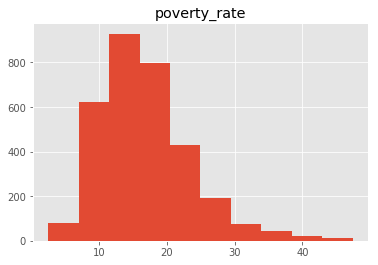

In [11]:
ht_pov = poverty_labels.hist(column='poverty_rate')

In [12]:
poverty = pd.merge(poverty_train, poverty_labels, on='row_id')
poverty.shape

(3198, 35)

From the summary statistics above, should be clear that there are currently three categorical variables:
- area__rucc with 9 values: 
 - 'Nonmetro - Urban population of 2,500 to 19,999, adjacent to a metro area' counties are most frequent with 608 counties.
 - 'Nonmetro - Urban population of 20,000 or more, not adjacent to a metro area' counties are most infrequent with 100 counties.
- area__urban_influence	with 12 values: 
 - 'Small-in a metro area with fewer than 1 million residents' counties are most frequent with 692 counties.
 - 'Noncore not adjacent to a metro/micro area and contains a town of 2,500  or more residents' counties are most infrequent with 122.
- econ__economic_typology with 6 values: 
 - 'Non specialized' economic typology counties are most frequent with 1266 counties. 
 - 'Mining-dependent' economic typologpy counties are most infrequent with 254 counties.

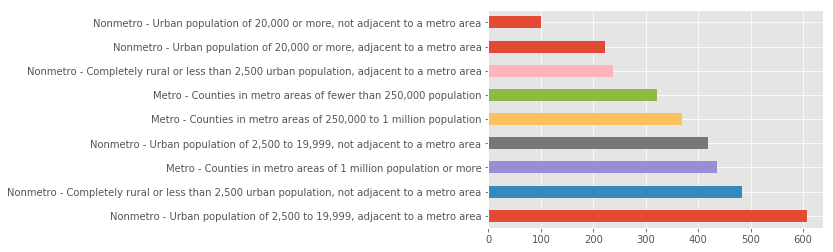

In [13]:
bh_ar = poverty.area__rucc.value_counts().plot.barh()

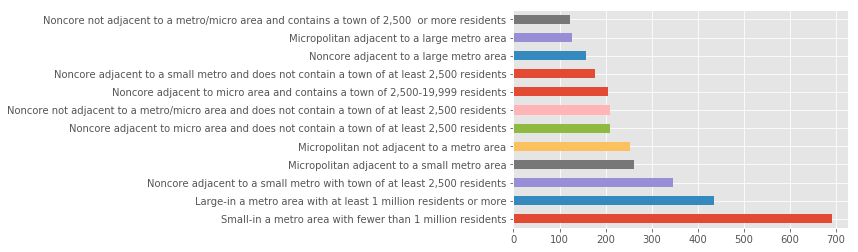

In [14]:
bh_aui = poverty.area__urban_influence.value_counts().plot.barh()

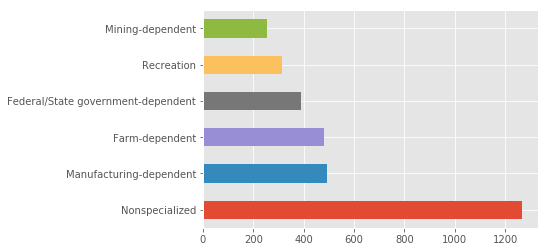

In [15]:
bh_eet = poverty.econ__economic_typology.value_counts().plot.barh()

### Data Exploration and Visualization of Categorical Variables
Here the predictive value of the categorical variables 'econ\_\_economic\_typology', 'area\_\_urban\_influence', 'area\_\_rucc' and 'yr' is explored. Boxplots and the ratio SSG / SST as used in one way analysis of variance (ANOVA) are used to determine which categorical variables hold most predictive value.

The boxplots of the categorical variables 'econ\_\_economic\_typology', 'area\_\_urban\_influence' and 'area\_\_rucc' show interesting variation:
* 'Farm-dependent' counties have the lowest poverty rates and 'Federal/State government-dependent' counties have the highest poverty rates.
* 'Large-in a metro area with at least 1 million residents or more' counties have the lowest poverty rates.
* 'Metro - Counties in metro areas with 1 million population or more' counties have the lowest poverty rates.

It is clear by computing the ANOVA ratio SSG/SST, that more of the variation in poverty rates is explained by 'area\_\_urban\_influence'. The two variables 'area\_\_urban\_influence' and 'area\_\_rucc' are considered redundant. Only the categorical variable 'area\_\_urban\_influence' shall be used in the regression model.

Furthermore by combining feature more interesting categorical variables can be created explaining much more of the variance in poverty rates.
* 'econ\_\_economic\_typology' and 'area\_\_urban_influence' see the boxplot here under
* 'demo\_\_pct\_aged\_65\_years\_and\_older' and 'area\_\_urban\_influence' see the boxplots here under

The difference in poverty over year 'a' and 'b' is really minimal. Furthermore it doesn't make sense to use this feature to predict poverty, in order to create a model that generalizes over the years. This feature will be droped at the cleaning stage.

In [16]:
def anova_ssg_sst(input_df, column, by):
    mean = np.mean(input_df.loc[:,column])
    sst = np.var(input_df.loc[:,column], ddof=1)
    cats = poverty.loc[:,by].unique()
    cat_counts = poverty.loc[:,by].value_counts()
    cat_means = poverty.groupby(by).mean().loc[:,column]
    ssgs = [cat_counts.at[lb] * ((cat_means.at[lb] - mean)**2) for lb in cats]
    ssg = sum(ssgs)
    return ssg / sst

In [17]:
meanprops = dict(marker='D', markeredgecolor='black',
                      markerfacecolor='firebrick')

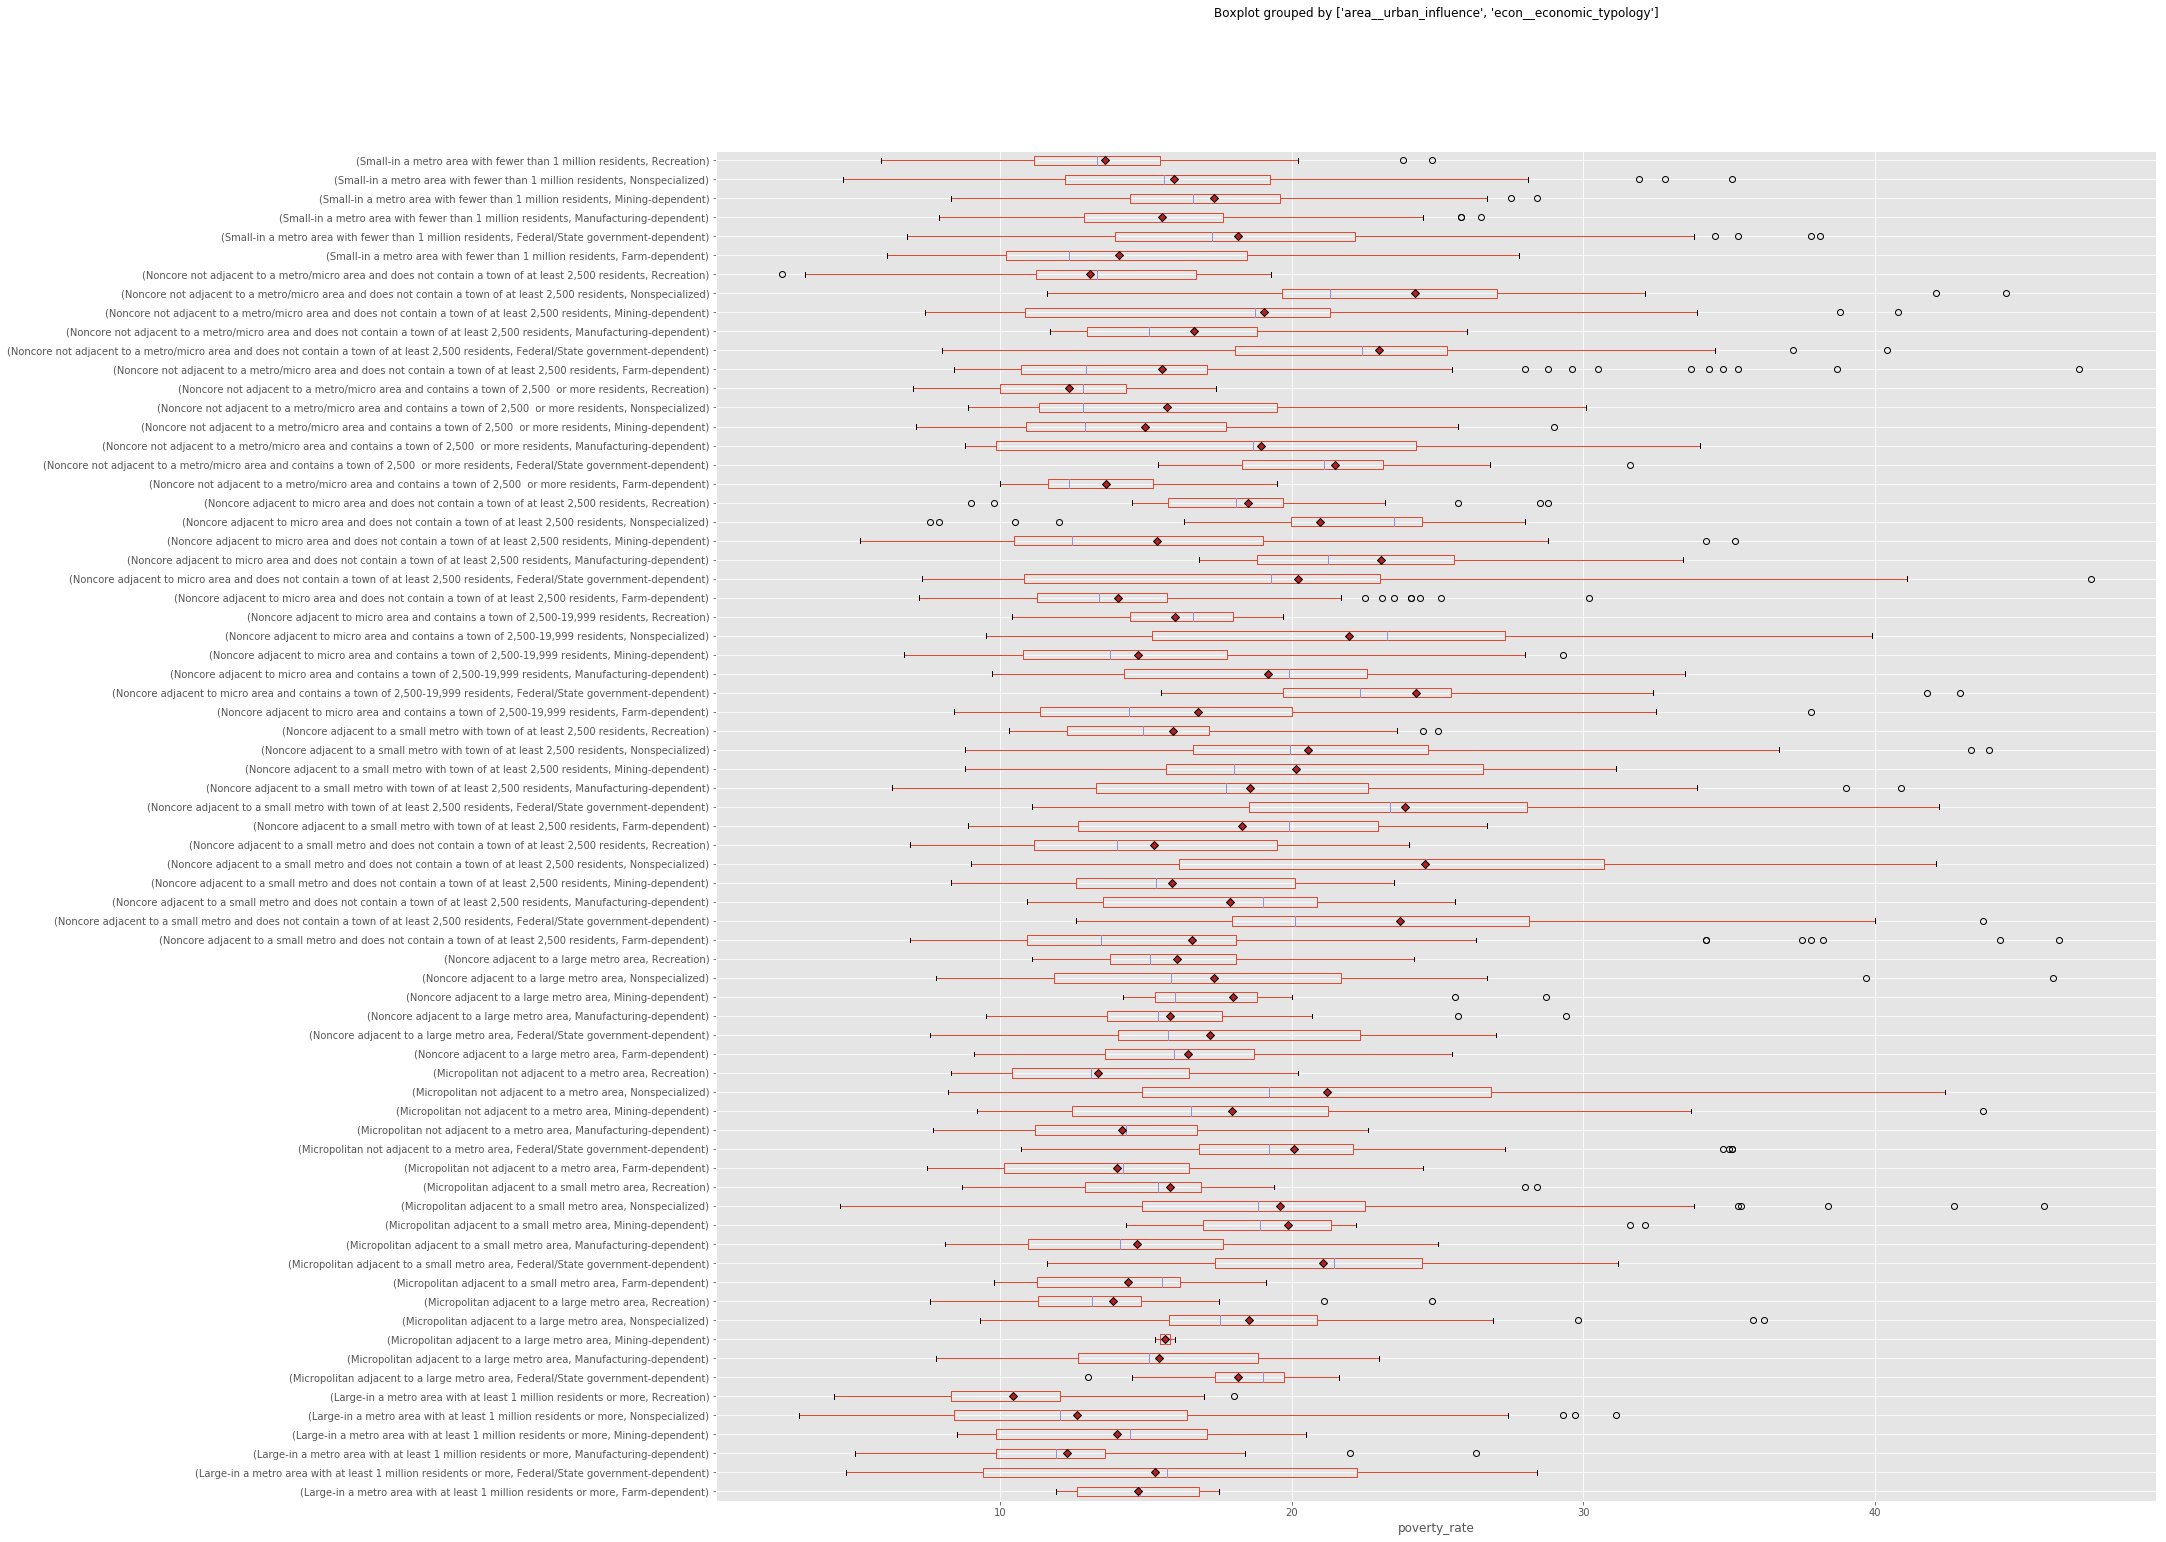

In [18]:
bpd_ar_eet = poverty.boxplot(column='poverty_rate', by=['area__urban_influence','econ__economic_typology'], meanprops=meanprops, showmeans=True, vert=False, figsize=(25,25))
tmp = bpd_ar_eet.set_xlabel("poverty_rate")
tmp = bpd_ar_eet.set_title("")

In [19]:
def create_old_age_cat(input_df):
    low_pct_olds = poverty.demo__pct_aged_65_years_and_older < 0.167000
    high_pct_olds = poverty.demo__pct_aged_65_years_and_older > 0.167000
    input_df.loc[low_pct_olds,'pct_65years_cat'] = 'low_pct_65years'
    input_df.loc[high_pct_olds,'pct_65years_cat'] = 'high_pct_65years'
    
    age_old_cats = ['low_pct_65years','high_pct_65years']
    input_df.loc[:,'pct_65years_cat'] = input_df.pct_65years_cat.astype('category')
    input_df.loc[:,'pct_65years_cat'] = input_df.pct_65years_cat.cat.set_categories(age_old_cats, ordered=True)
    return input_df

In [20]:
poverty = create_old_age_cat(poverty)

The general trend is that counties with a low percentage population 65 years or older have a higher poverty rate.

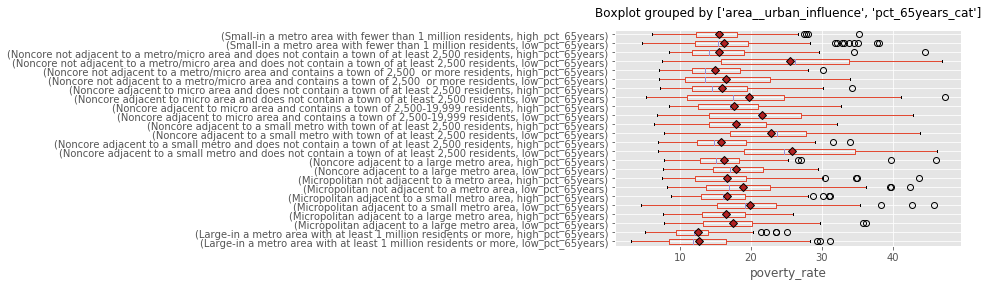

In [21]:
bpd_high_pct_olds = poverty.boxplot(column='poverty_rate', by=['area__urban_influence','pct_65years_cat'], meanprops=meanprops, showmeans=True, vert=False)
tmp = bpd_high_pct_olds.set_xlabel("poverty_rate")
tmp = bpd_high_pct_olds.set_title("")

In [22]:
# clean_chars = str.maketrans(dict.fromkeys('()'))
# [lb.get_text().translate(clean_chars) for lb in bpd_high_pct_olds.get_yticklabels()]

In [23]:
# [lb.get_text().translate(clean_chars).rsplit(',',1) for lb in bpd_high_pct_olds.get_yticklabels()]

In [24]:
# def create_aui_pct65y(input_df):
# aui_pct65_1 = (poverty.area__urban_influence == 'Large-in a metro area with at least 1 million residents or more') & (poverty.pct_65years_cat == 'low_pct_65years')
# aui_pct65_2 = (poverty.area__urban_influence == 'Large-in a metro area with at least 1 million residents or more') & (poverty.pct_65years_cat == 'high_pct_65years')
# aui_pct65_3 = (poverty.area__urban_influence == 'Micropolitan adjacent to a large metro area') & (poverty.pct_65years_cat == 'low_pct_65years')
# aui_pct65_4 = (poverty.area__urban_influence == 'Micropolitan adjacent to a large metro area') & (poverty.pct_65years_cat == 'high_pct_65years')
# aui_pct65_5 = (poverty.area__urban_influence == 'Micropolitan adjacent to a small metro area') & (poverty.pct_65years_cat == 'low_pct_65years')
# aui_pct65_6 = (poverty.area__urban_influence == 'Micropolitan adjacent to a small metro area') & (poverty.pct_65years_cat == 'high_pct_65years')
# aui_pct65_7 = (poverty.area__urban_influence == 'Micropolitan not adjacent to a metro area') & (poverty.pct_65years_cat == 'low_pct_65years')
# aui_pct65_8 = (poverty.area__urban_influence == 'Micropolitan not adjacent to a metro area') & (poverty.pct_65years_cat == 'high_pct_65years')
# aui_pct65_9 = (poverty.area__urban_influence == 'Noncore adjacent to a large metro area') & (poverty.pct_65years_cat == 'low_pct_65years')
# aui_pct65_10 = (poverty.area__urban_influence == 'Noncore adjacent to a large metro area') & (poverty.pct_65years_cat == 'high_pct_65years')
# aui_pct65_11 = (poverty.area__urban_influence == 'Noncore adjacent to a small metro and does not contain a town of at least 2,500 residents') & (poverty.pct_65years_cat == 'low_pct_65years')
# aui_pct65_12 = (poverty.area__urban_influence == 'Noncore adjacent to a small metro and does not contain a town of at least 2,500 residents') & (poverty.pct_65years_cat == 'high_pct_65years')
# aui_pct65_13 = (poverty.area__urban_influence == 'Noncore adjacent to a small metro with town of at least 2,500 residents') & (poverty.pct_65years_cat == 'low_pct_65years')
# aui_pct65_14 = (poverty.area__urban_influence == 'Noncore adjacent to a small metro with town of at least 2,500 residents') & (poverty.pct_65years_cat == 'high_pct_65years')
# aui_pct65_15 = (poverty.area__urban_influence == 'Noncore adjacent to micro area and contains a town of 2,500-19,999 residents') & (poverty.pct_65years_cat == 'low_pct_65years')
# aui_pct65_16 = (poverty.area__urban_influence == 'Noncore adjacent to micro area and contains a town of 2,500-19,999 residents') & (poverty.pct_65years_cat == 'high_pct_65years')
# aui_pct65_17 = (poverty.area__urban_influence == 'Noncore adjacent to micro area and does not contain a town of at least 2,500 residents') & (poverty.pct_65years_cat == 'low_pct_65years')
# aui_pct65_18 = (poverty.area__urban_influence == 'Noncore adjacent to micro area and does not contain a town of at least 2,500 residents') & (poverty.pct_65years_cat == 'high_pct_65years')
# aui_pct65_19 = (poverty.area__urban_influence == 'Noncore not adjacent to a metro/micro area and contains a town of 2,500  or more residents') & (poverty.pct_65years_cat == 'low_pct_65years')
# aui_pct65_20 = (poverty.area__urban_influence == 'Noncore not adjacent to a metro/micro area and contains a town of 2,500  or more residents') & (poverty.pct_65years_cat == 'high_pct_65years')
# aui_pct65_21 = (poverty.area__urban_influence == 'Noncore not adjacent to a metro/micro area and does not contain a town of at least 2,500 residents') & (poverty.pct_65years_cat == 'low_pct_65years')
# aui_pct65_22 = (poverty.area__urban_influence == 'Noncore not adjacent to a metro/micro area and does not contain a town of at least 2,500 residents') & (poverty.pct_65years_cat == 'high_pct_65years')
# aui_pct65_23 = (poverty.area__urban_influence == 'Small-in a metro area with fewer than 1 million residents') & (poverty.pct_65years_cat == 'low_pct_65years')
# aui_pct65_24 = (poverty.area__urban_influence == 'Small-in a metro area with fewer than 1 million residents') & (poverty.pct_65years_cat == 'high_pct_65years')

In [25]:
# poverty.loc[aui_pct65_1,'aui_pct65y'] = 'Large-in a metro area with at least 1 million residents or more, low_pct_65years'
# poverty.loc[aui_pct65_2,'aui_pct65y'] = 'Large-in a metro area with at least 1 million residents or more, high_pct_65years'
# poverty.loc[aui_pct65_3,'aui_pct65y'] = 'Micropolitan adjacent to a large metro area, low_pct_65years'
# poverty.loc[aui_pct65_4,'aui_pct65y'] = 'Micropolitan adjacent to a large metro area, high_pct_65years'
# poverty.loc[aui_pct65_5,'aui_pct65y'] = 'Micropolitan adjacent to a small metro area, low_pct_65years'
# poverty.loc[aui_pct65_6,'aui_pct65y'] = 'Micropolitan adjacent to a small metro area, high_pct_65years'
# poverty.loc[aui_pct65_7,'aui_pct65y'] = 'Micropolitan not adjacent to a metro area, low_pct_65years'
# poverty.loc[aui_pct65_8,'aui_pct65y'] = 'Micropolitan not adjacent to a metro area, high_pct_65years'
# poverty.loc[aui_pct65_9,'aui_pct65y'] = 'Noncore adjacent to a large metro area, low_pct_65years'
# poverty.loc[aui_pct65_10,'aui_pct65y'] = 'Noncore adjacent to a large metro area, high_pct_65years'
# poverty.loc[aui_pct65_11,'aui_pct65y'] = 'Noncore adjacent to a small metro and does not contain a town of at least 2,500 residents, low_pct_65years'
# poverty.loc[aui_pct65_12,'aui_pct65y'] = 'Noncore adjacent to a small metro and does not contain a town of at least 2,500 residents, high_pct_65years'
# poverty.loc[aui_pct65_13,'aui_pct65y'] = 'Noncore adjacent to a small metro with town of at least 2,500 residents, low_pct_65years'
# poverty.loc[aui_pct65_14,'aui_pct65y'] = 'Noncore adjacent to a small metro with town of at least 2,500 residents, high_pct_65years'
# poverty.loc[aui_pct65_15,'aui_pct65y'] = 'Noncore adjacent to micro area and does not contain a town of at least 2,500 residents, low_pct_65years'
# poverty.loc[aui_pct65_16,'aui_pct65y'] = 'Noncore adjacent to a small metro with town of at least 2,500 residents, high_pct_65years'
# poverty.loc[aui_pct65_17,'aui_pct65y'] = 
# poverty.loc[aui_pct65_18,'aui_pct65y'] = 
# poverty.loc[aui_pct65_19,'aui_pct65y'] = 
# poverty.loc[aui_pct65_20,'aui_pct65y'] = 
# poverty.loc[aui_pct65_21,'aui_pct65y'] = 
# poverty.loc[aui_pct65_22,'aui_pct65y'] = 
# poverty.loc[aui_pct65_23,'aui_pct65y'] = 
# poverty.loc[aui_pct65_24,'aui_pct65y'] = 

### Data Exploration and Visualization of Quantitative Variables
For the quantitative variables the correlation matrix is computed first followed by the visual display of the scatterplot matrices.

#### Correlation matrix
Compute the correlation matrix. Identify features with highest positive and negative pearson correlation coefficient. 

The features that correlate most positevely with poverty_rate (> 0.5):

| Features                                            | Pearson Correlation Coefficient
|:----------------------------------------------------|---------
| demo__pct_adults_less_than_a_high_school_diploma    | 0.680360
| health__homicides_per_100k                          | 0.621399
| econ__pct_unemployment                              | 0.592022
| health__pct_low_birthweight                         | 0.565456
| econ__pct_uninsured_adults                          | 0.541712
| health__pct_diabetes                                | 0.537038
| demo__pct_non_hispanic_african_american             | 0.507048

The features that correlate most negatively with poverty_rate (< - 0.5):

| Features                                            | Pearson Correlation Coefficient
|:----------------------------------------------------|---------
| econ__pct_civilian_labor                            | -0.670417

The correlation matrix of interest is shown here under:

| Features                                            | Pearson Correlation Coefficient
|:----------------------------------------------------|---------
| econ__pct_civilian_labor                            | -0.670417
| demo__pct_non_hispanic_white                        | -0.499974
| demo__pct_adults_bachelors_or_higher                | -0.467134
| demo__pct_adults_with_some_college                  | -0.363875
| health__pct_excessive_drinking                      | -0.353254
| demo__pct_asian                                     | -0.163033
| demo__pct_aged_65_years_and_older                   | -0.088123
| demo__pct_female                                    | -0.068065
| demo__pct_below_18_years_of_age                     |  0.039237
| health__air_pollution_particulate_matter            |  0.058582
| econ__pct_uninsured_children                        |  0.098882
| demo__pct_hispanic                                  |  0.105574
| demo__birth_rate_per_1k                             |  0.127506
| health__pop_per_primary_care_physician              |  0.156942
| demo__pct_adults_with_high_school_diploma           |  0.202928
| demo__pct_american_indian_or_alaskan_native         |  0.236508
| demo__death_rate_per_1k                             |  0.244093
| health__pop_per_dentist                             |  0.268996
| health__pct_adult_smoking                           |  0.395457
| health__motor_vehicle_crash_deaths_per_100k         |  0.420348
| health__pct_physical_inacticity                     |  0.437680
| health__pct_adult_obesity                           |  0.444293
| demo__pct_non_hispanic_african_american             |  0.507048
| health__pct_diabetes                                |  0.537038
| econ__pct_uninsured_adults                          |  0.541712
| health__pct_low_birthweight                         |  0.565456
| econ__pct_unemployment                              |  0.592022
| health__homicides_per_100k                          |  0.621399
| demo__pct_adults_less_than_a_high_school_diploma    |  0.680360

In [26]:
corr_m = poverty.corr()
corr_m.sort_values(by='poverty_rate').loc[:,'poverty_rate']

econ__pct_civilian_labor                           -0.670417
demo__pct_non_hispanic_white                       -0.499974
demo__pct_adults_bachelors_or_higher               -0.467134
demo__pct_adults_with_some_college                 -0.363875
health__pct_excessive_drinking                     -0.353254
demo__pct_asian                                    -0.163033
demo__pct_aged_65_years_and_older                  -0.088123
demo__pct_female                                   -0.068065
row_id                                             -0.010522
demo__pct_below_18_years_of_age                     0.039237
health__air_pollution_particulate_matter            0.058582
econ__pct_uninsured_children                        0.098882
demo__pct_hispanic                                  0.105574
demo__birth_rate_per_1k                             0.127506
health__pop_per_primary_care_physician              0.156942
demo__pct_adults_with_high_school_diploma           0.202928
demo__pct_american_india

These features will be dropped or transformed to improve their predictive value concerning the target variable poverty rate ( > - 0.3 and < 0.3):

| Features                                            | Pearson Correlation Coefficient
|:----------------------------------------------------|---------
| demo__pct_asian	                                  | -0.163033
| demo__pct_aged_65_years_and_older	                  | -0.088123
| demo__pct_female	                                  | -0.068065
| demo__pct_below_18_years_of_age	                  | 0.039237
| health__air_pollution_particulate_matter	          | 0.058582
| econ__pct_uninsured_children	                      | 0.098882
| demo__pct_hispanic	                              | 0.105574
| demo__birth_rate_per_1k	                          | 0.127506
| health__pop_per_primary_care_physician	          | 0.156942
| demo__pct_adults_with_high_school_diploma	          | 0.202928
| demo__pct_american_indian_or_alaskan_native	      | 0.236508
| demo__death_rate_per_1k	                          | 0.244093
| health__pop_per_dentist	                          |0.268996

#### Scatter plot matrices
After reading the '[Rural Poverty & Well-being](https://www.ers.usda.gov/topics/rural-economy-population/rural-poverty-well-being/poverty-overview.aspx)' report it is clear that education, ethnicity and health related issues play an important role in predicting poverty. In this dataset are also added economic indicators of United States' counties. The scatterplot matrices of these four groups of socioeconomic indicators are shown here under. We applied linear statistical transformations to the target variable 'poverty_rate' such square root, exponential and square but they did not improve substantially the correlation coefficients and the scatterplot matrices.

The correlation matrices and scatterplot matrices visually confirm that the variables correlate moderatly strong with the target variable 'poverty_rate' seem to have a linear relationship.

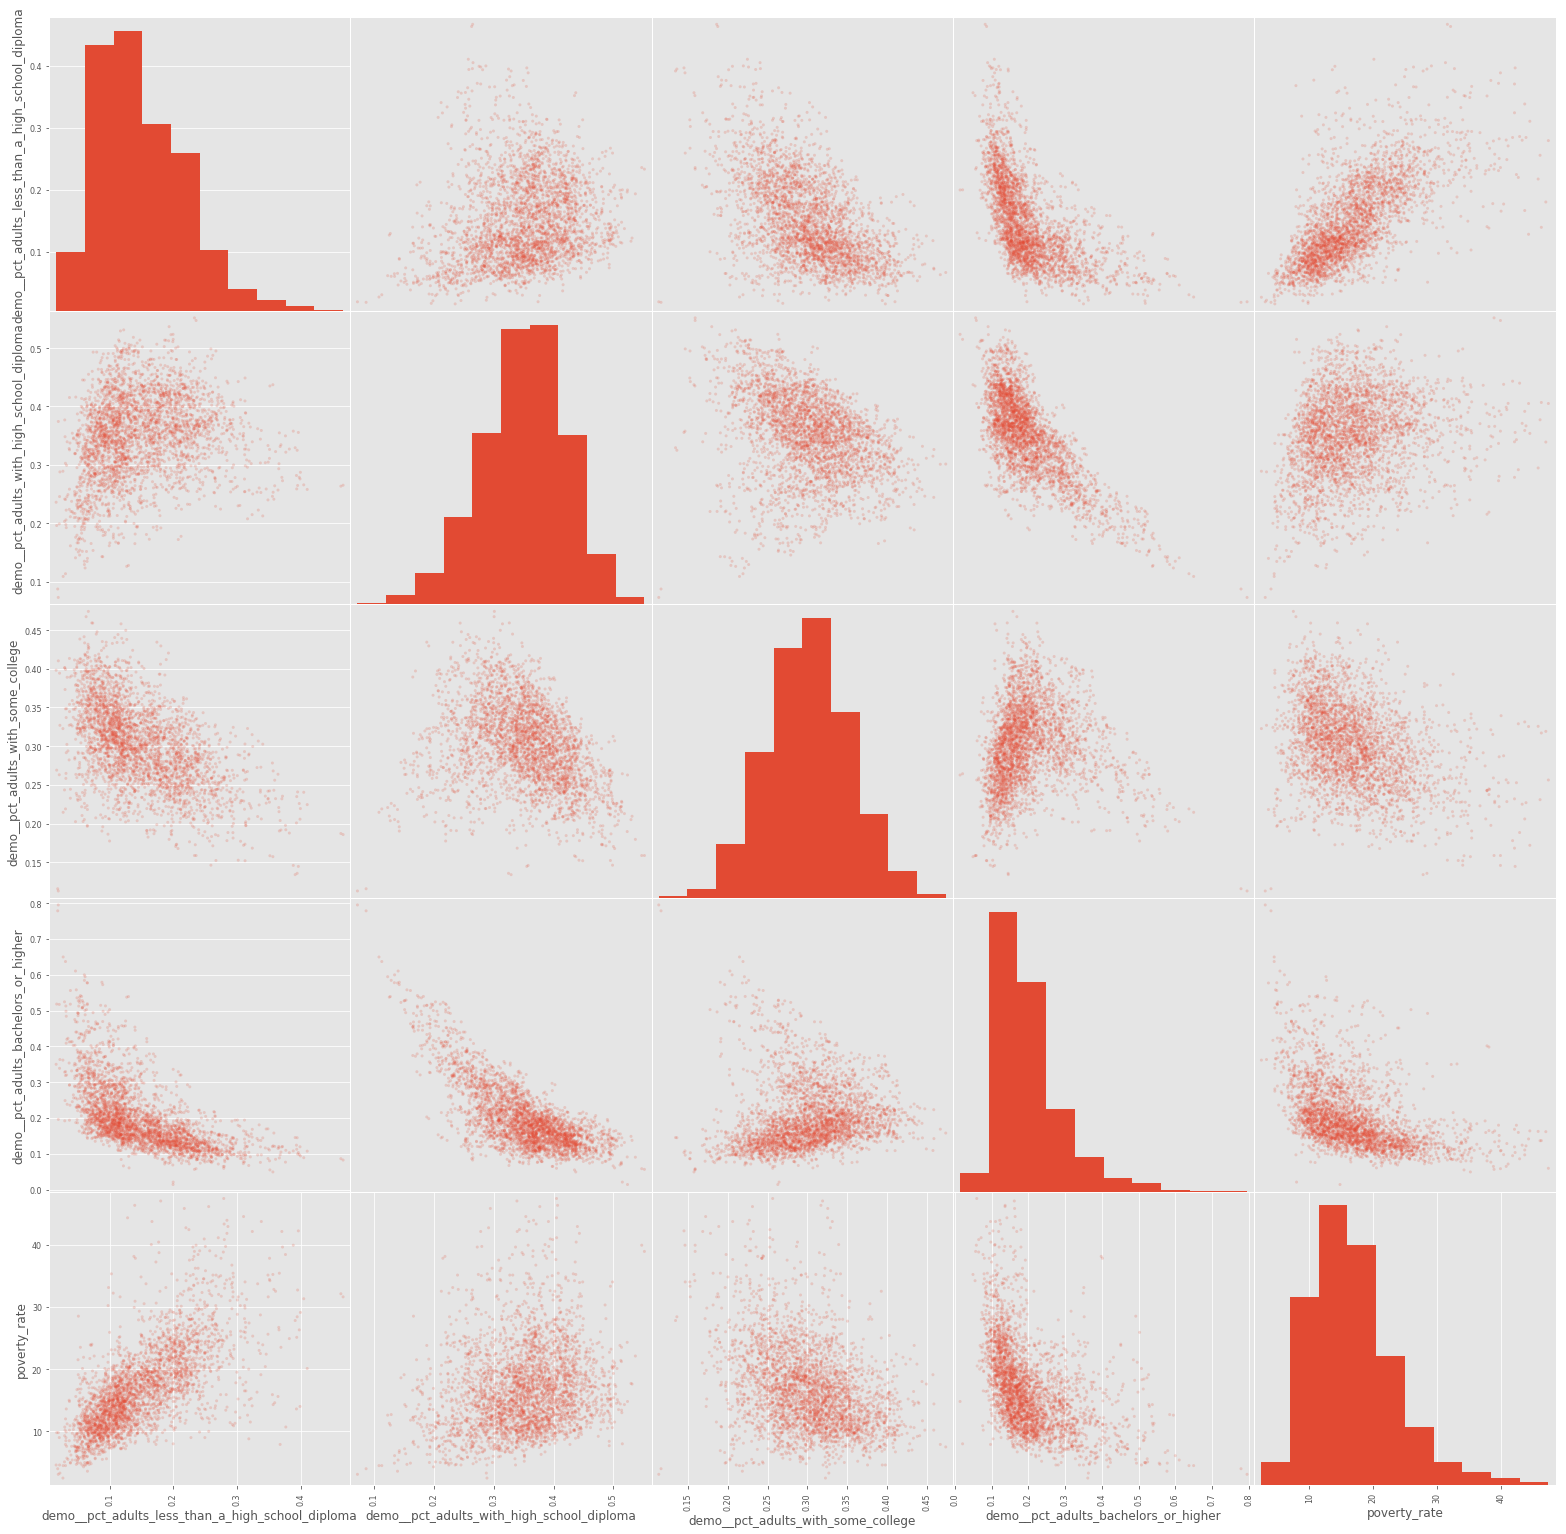

In [27]:
scatter_educ = scatter_matrix(poverty.loc[:, ['demo__pct_adults_less_than_a_high_school_diploma','demo__pct_adults_with_high_school_diploma'
                                              ,'demo__pct_adults_with_some_college','demo__pct_adults_bachelors_or_higher'
                                              ,'poverty_rate']], alpha=0.2, figsize=(27, 27), diagonal='hist')

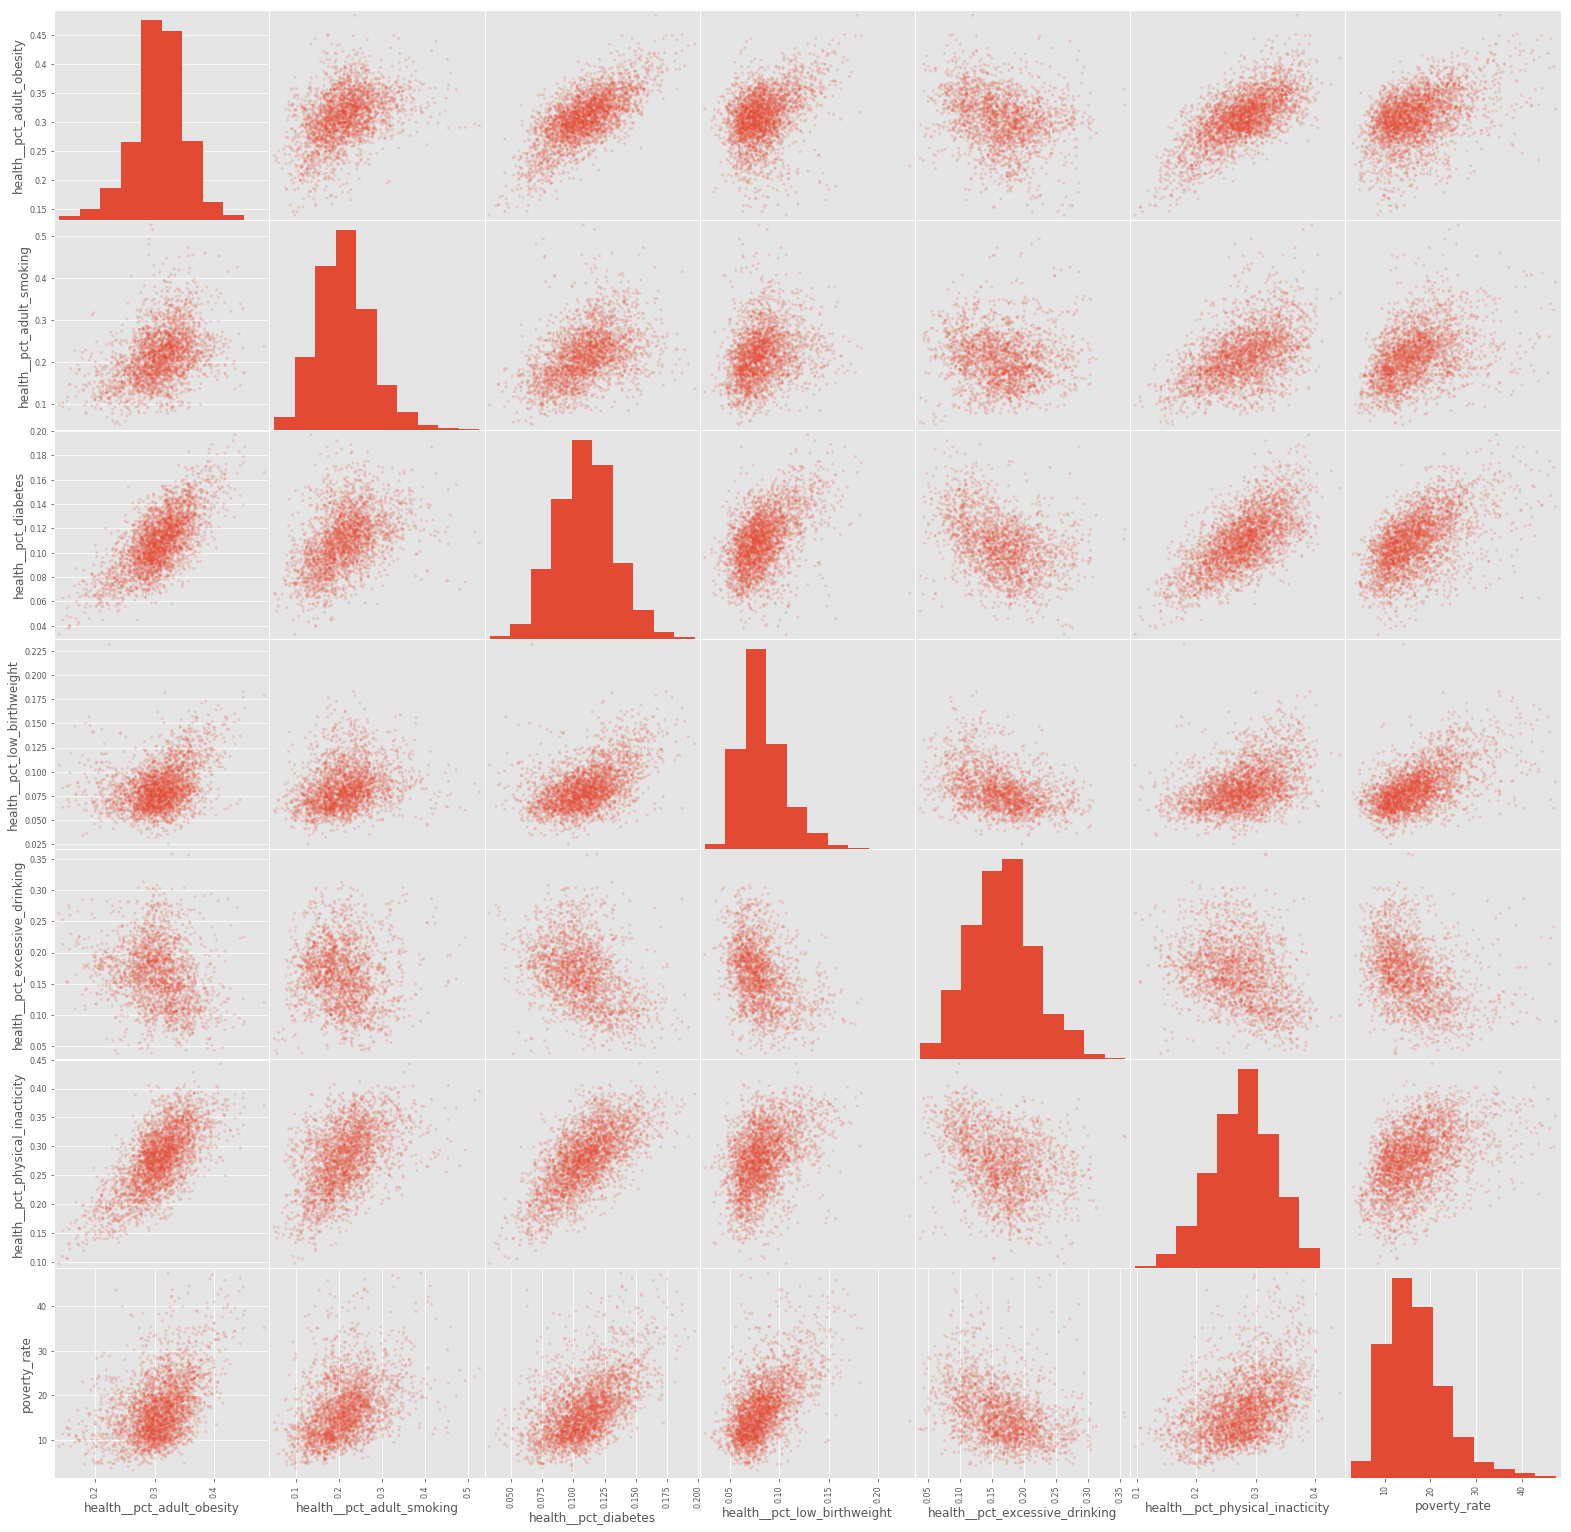

In [28]:
scatter_health1 = scatter_matrix(poverty.loc[:, ['health__pct_adult_obesity','health__pct_adult_smoking'
                                              ,'health__pct_diabetes','health__pct_low_birthweight'
                                              ,'health__pct_excessive_drinking','health__pct_physical_inacticity'
                                              ,'poverty_rate']], alpha=0.2, figsize=(27, 27), diagonal='hist')

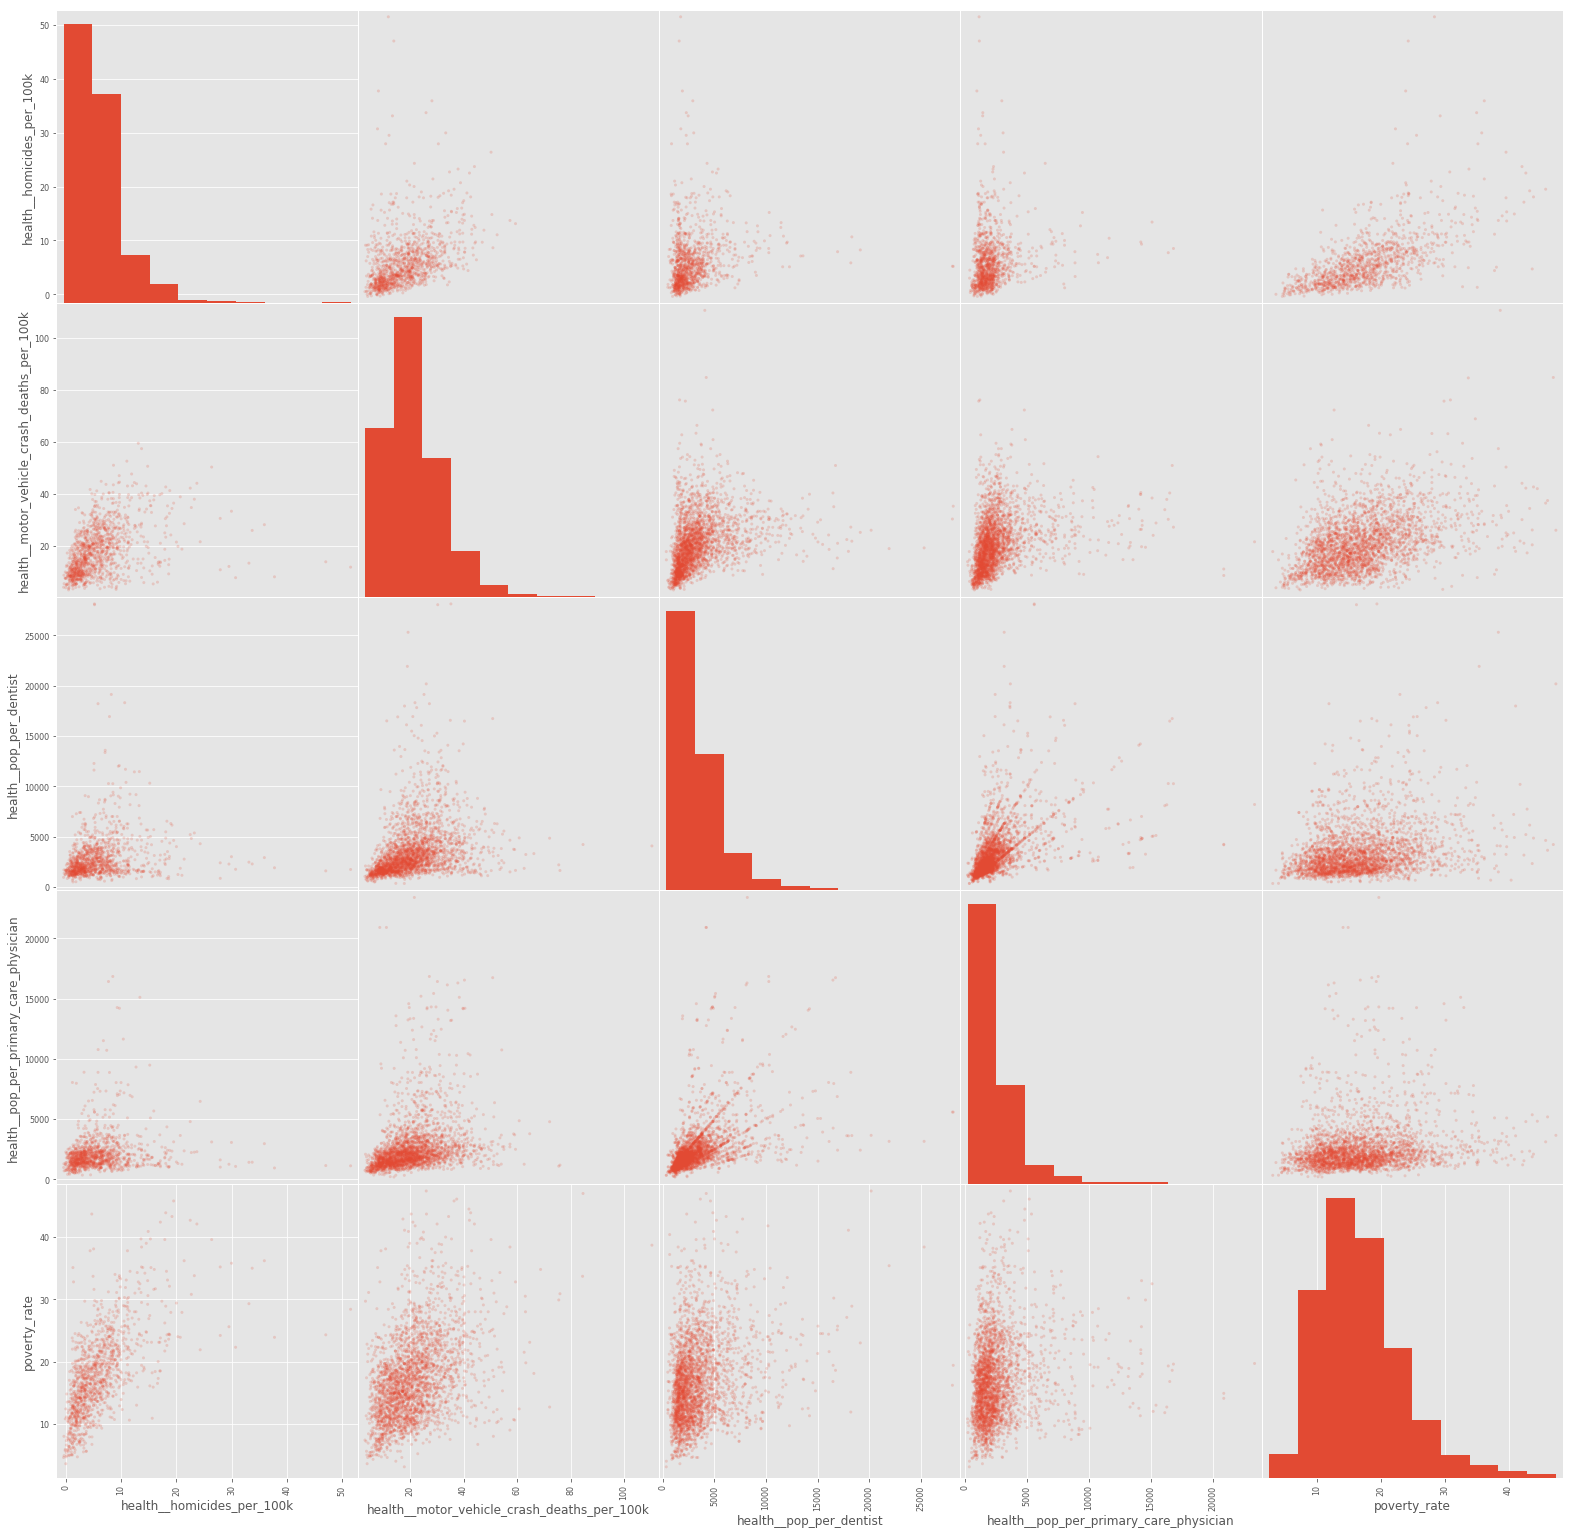

In [29]:
scatter_health2 = scatter_matrix(poverty.loc[:, ['health__homicides_per_100k'
                                              ,'health__motor_vehicle_crash_deaths_per_100k','health__pop_per_dentist'
                                              ,'health__pop_per_primary_care_physician'
                                              ,'poverty_rate']], alpha=0.2, figsize=(27, 27), diagonal='hist')

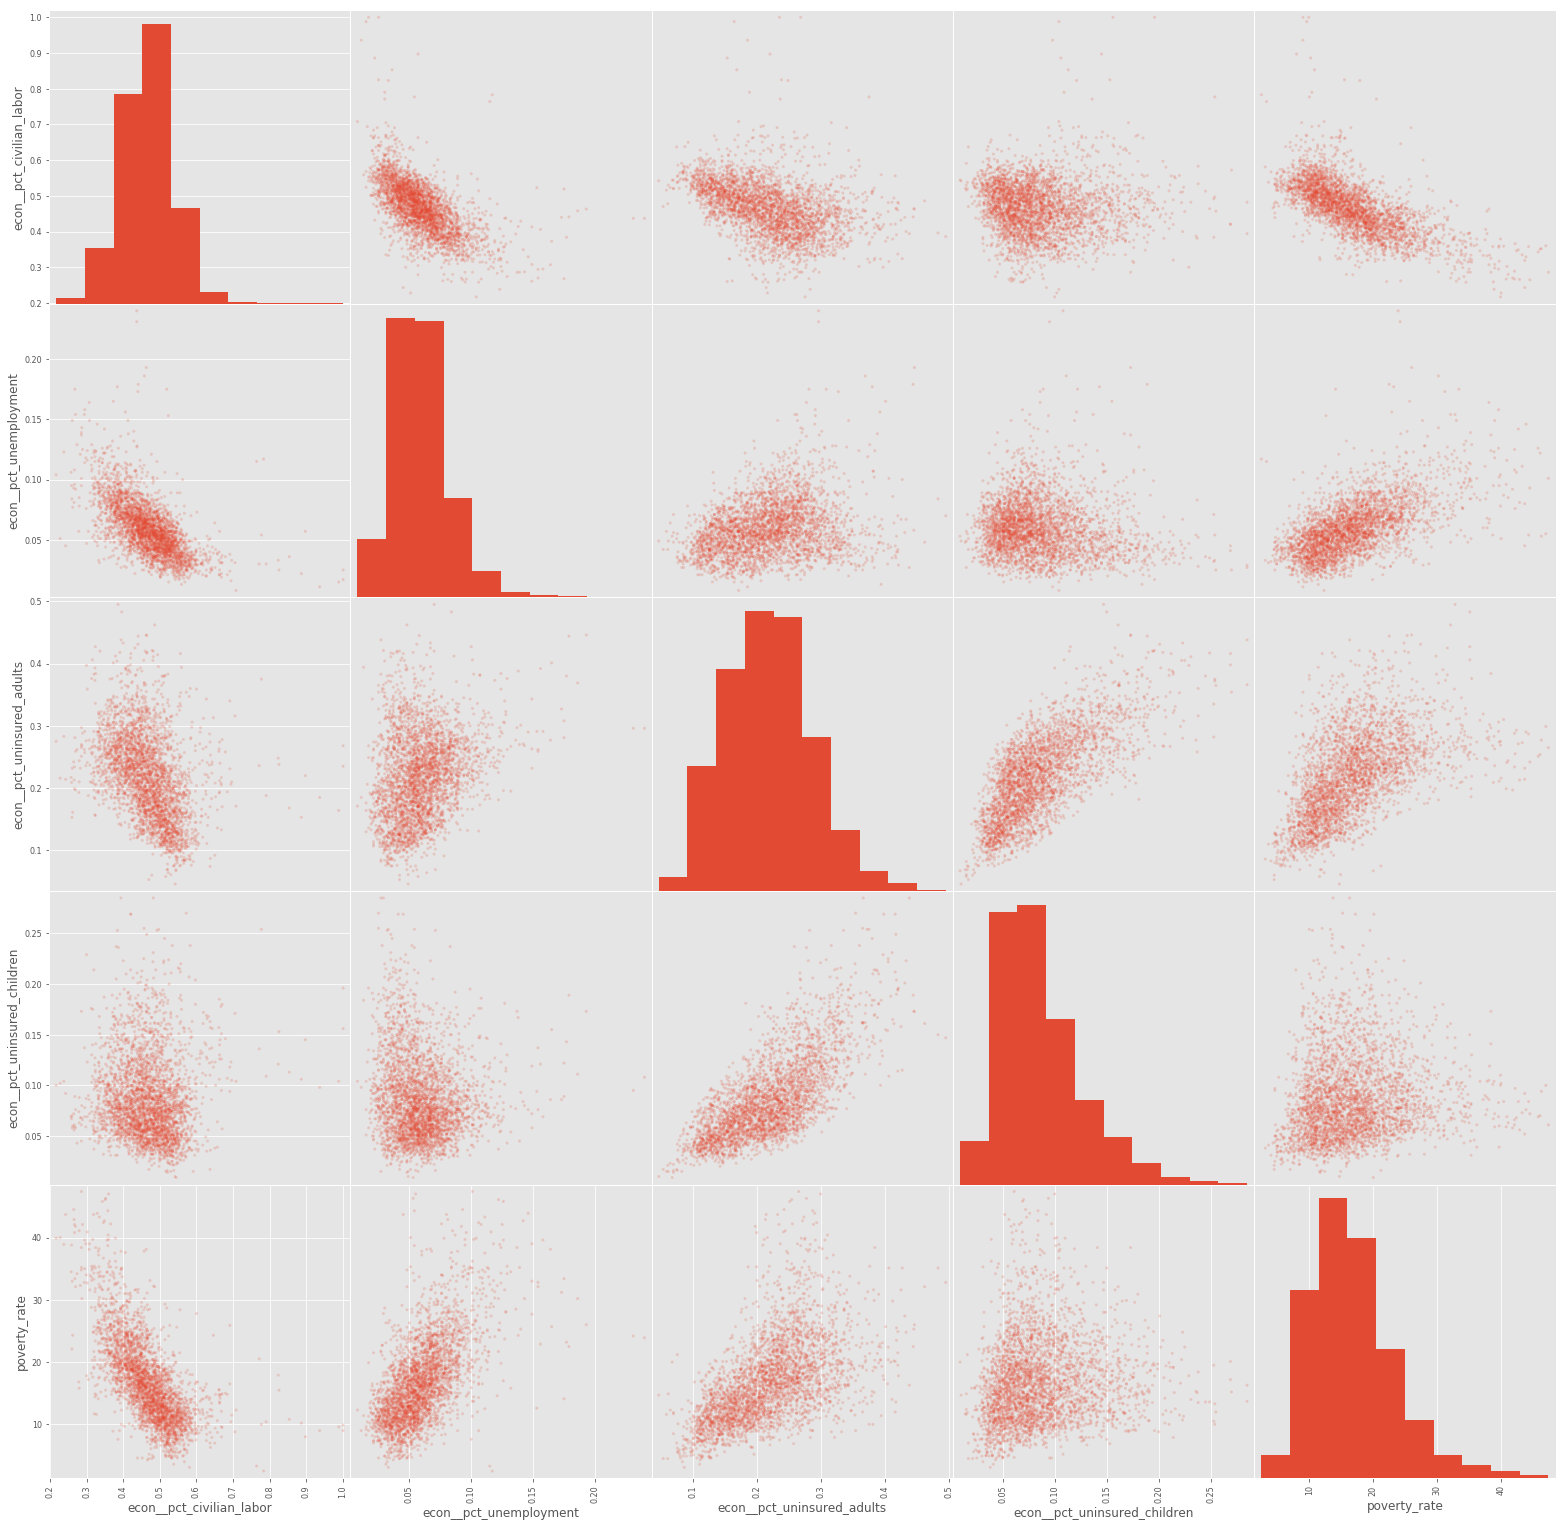

In [30]:
scatter_econ = scatter_matrix(poverty.loc[:, ['econ__pct_civilian_labor','econ__pct_unemployment'
                                              ,'econ__pct_uninsured_adults','econ__pct_uninsured_children'
                                              ,'poverty_rate']], alpha=0.2, figsize=(27, 27), diagonal='hist')

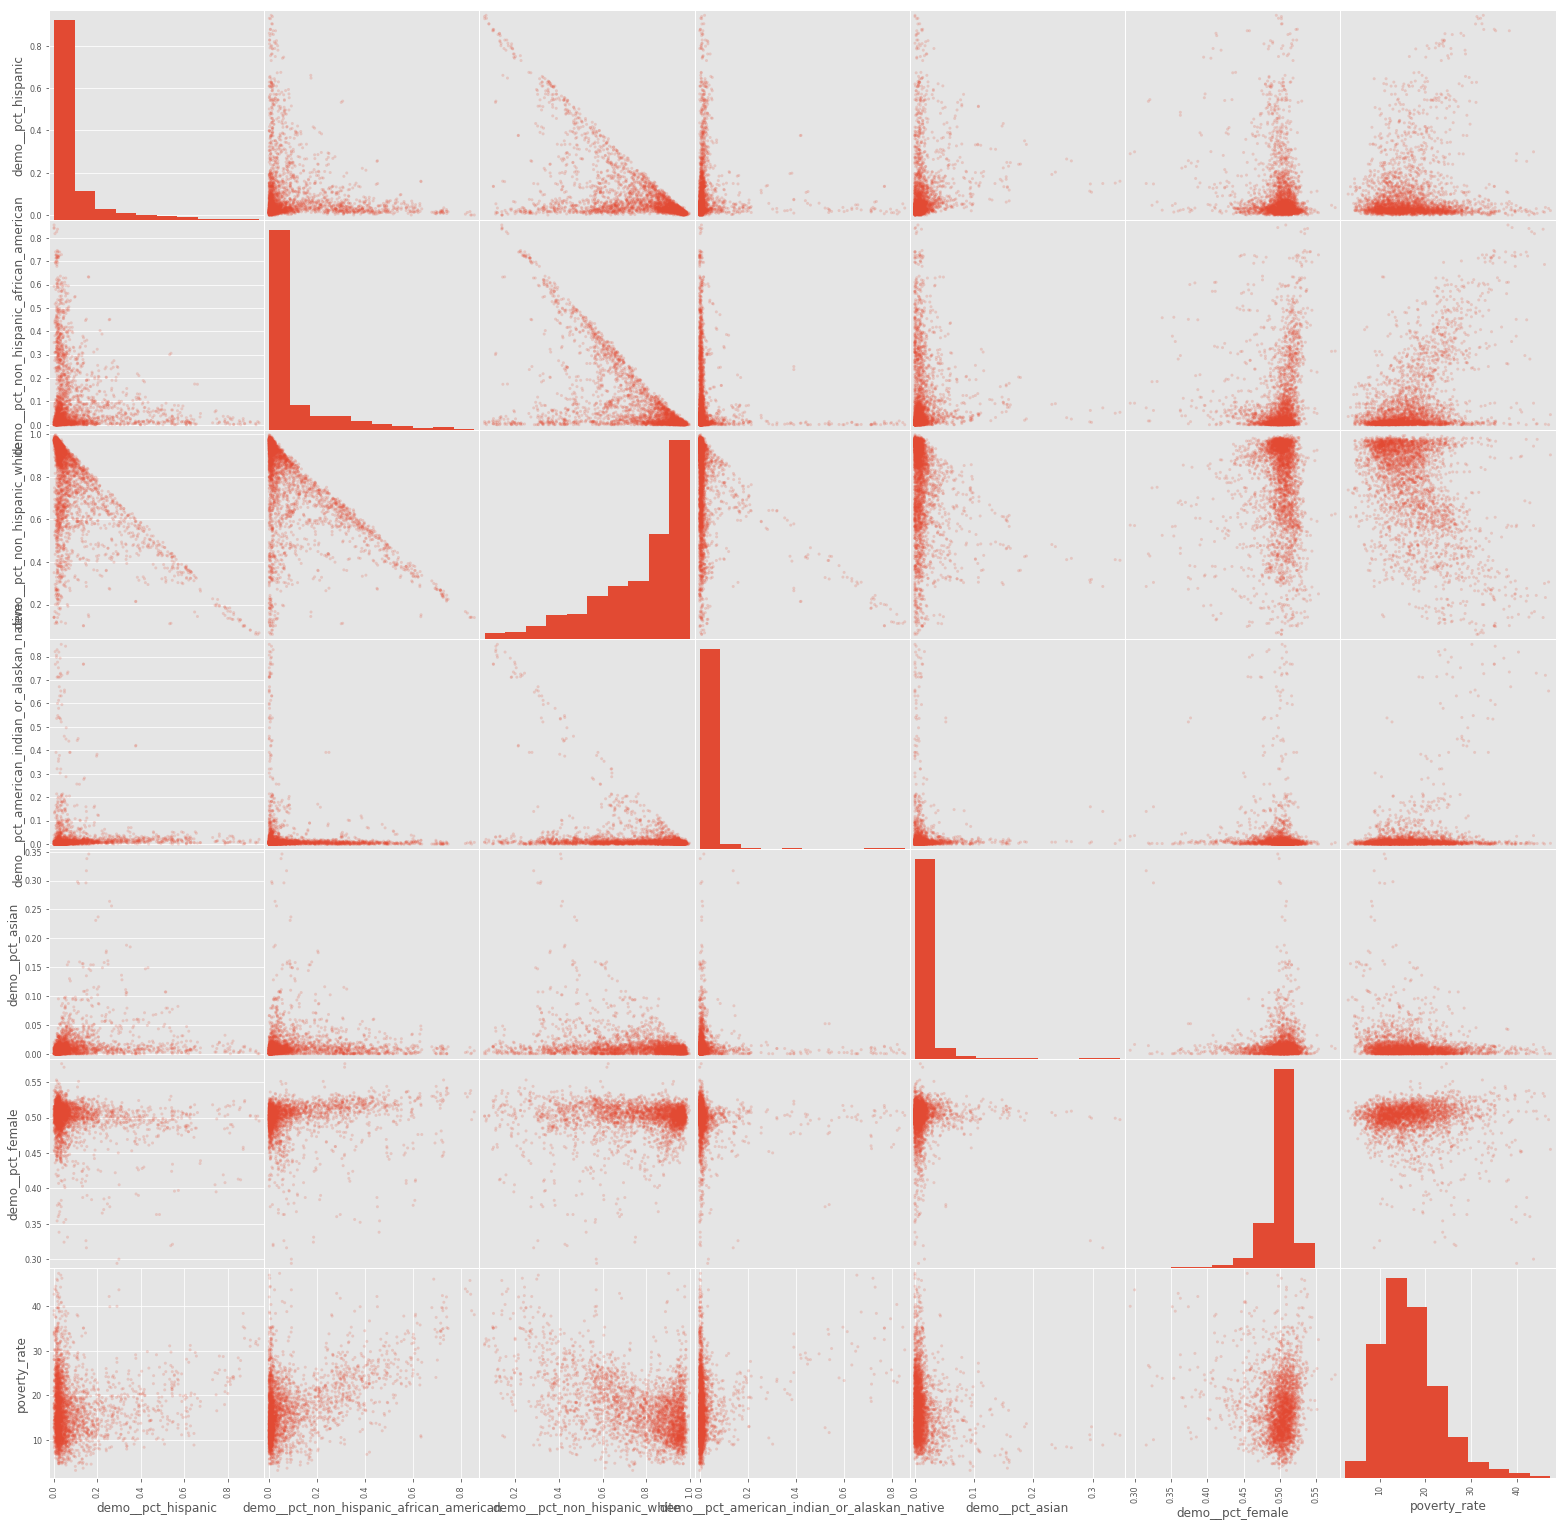

In [31]:
scatter_ethnic = scatter_matrix(poverty.loc[:, ['demo__pct_hispanic','demo__pct_non_hispanic_african_american'
                                              ,'demo__pct_non_hispanic_white','demo__pct_american_indian_or_alaskan_native'
                                              ,'demo__pct_asian', 'demo__pct_female'
                                              ,'poverty_rate']], alpha=0.2, figsize=(27, 27), diagonal='hist')

These non linear features behave like categorical features.

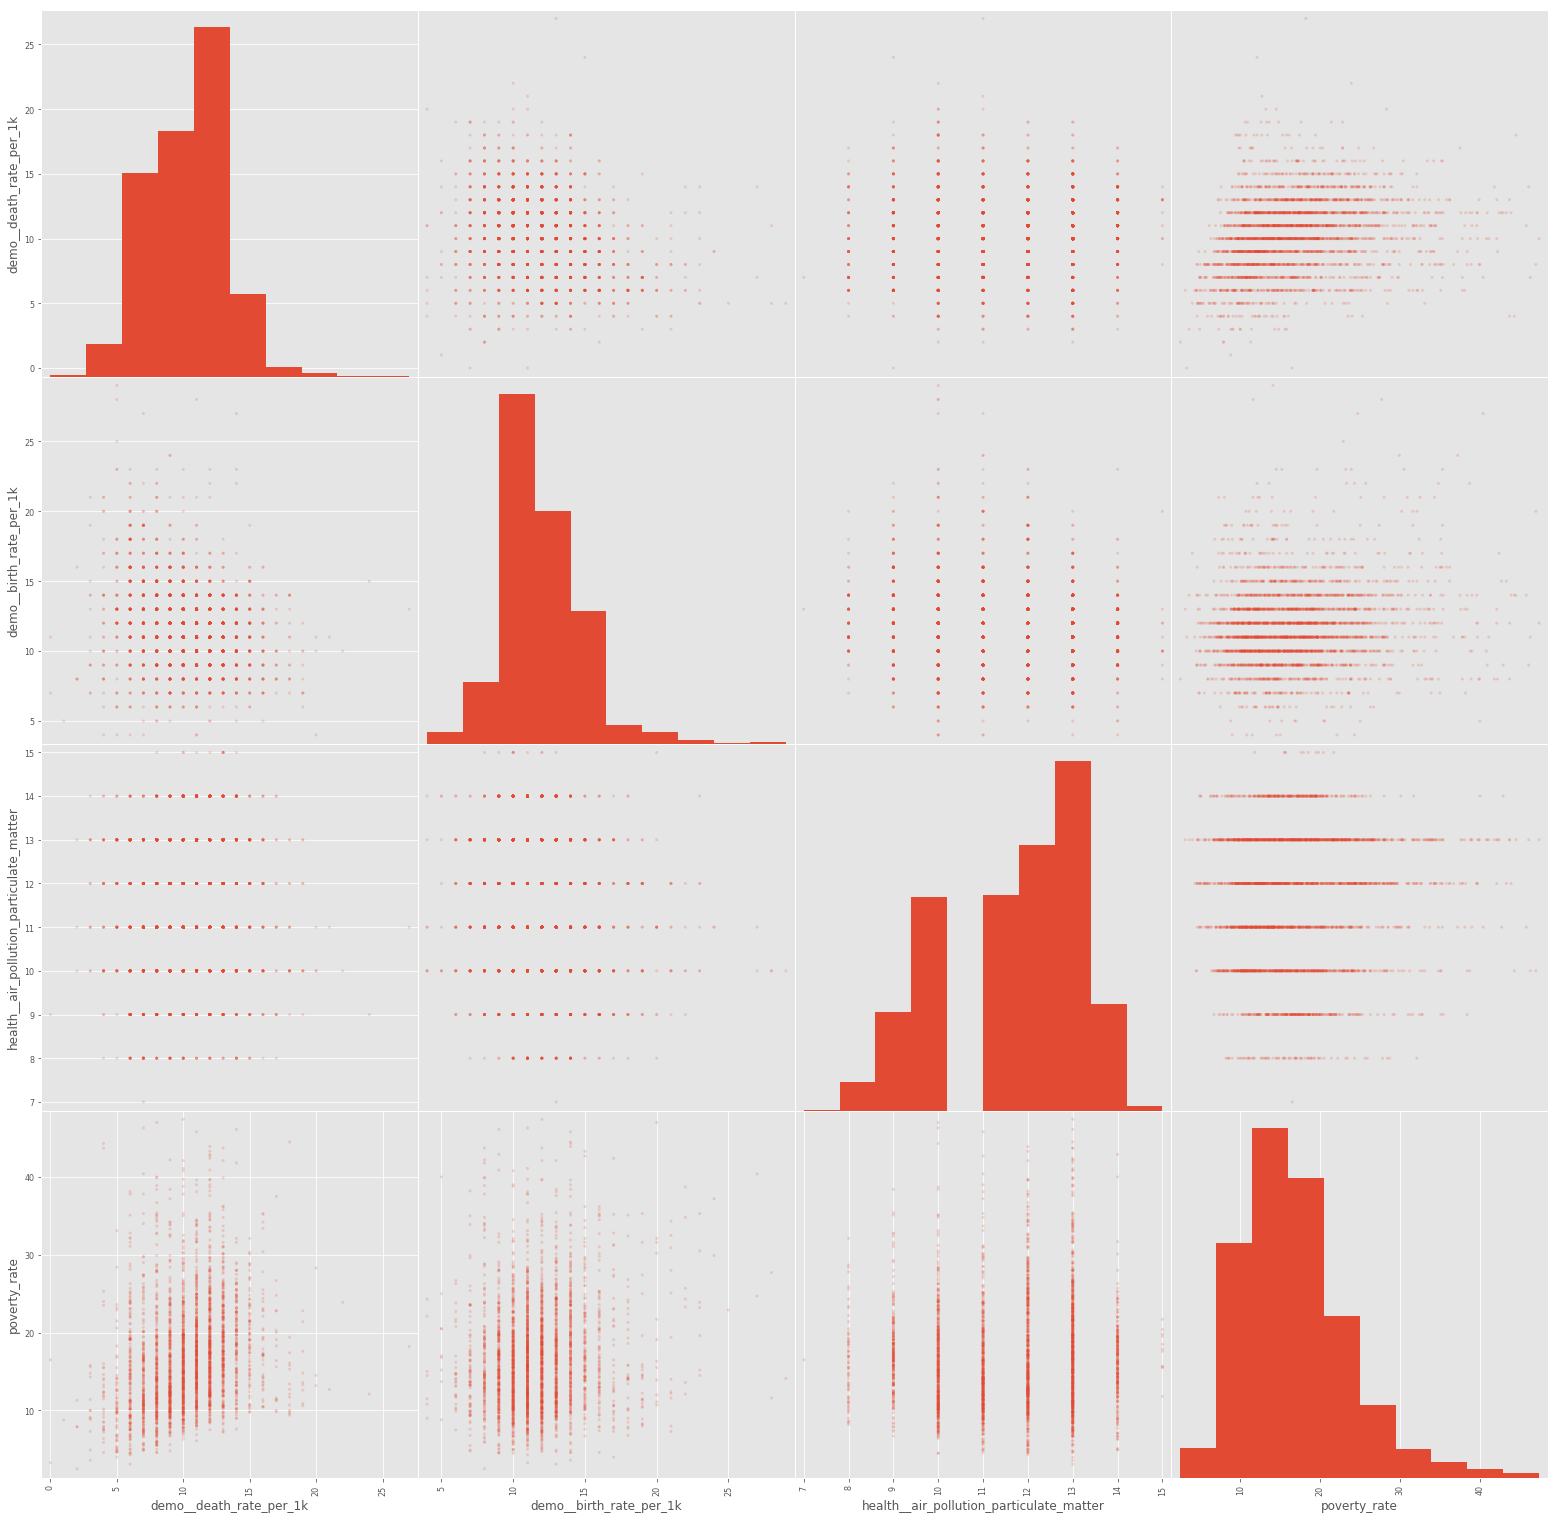

In [32]:
scatter_non_ln = scatter_matrix(poverty.loc[:, ['demo__death_rate_per_1k'
                                              ,'demo__birth_rate_per_1k'
                                              ,'health__air_pollution_particulate_matter'
                                              ,'poverty_rate']], alpha=0.2, figsize=(27, 27), diagonal='hist')

### Creation and Visualization of New Categorical Variables
After reading the '[Rural Poverty & Well-being](https://www.ers.usda.gov/topics/rural-economy-population/rural-poverty-well-being/poverty-overview.aspx)' report, it is clear that ethnicity plays an important role in predicting poverty. An attempt is made to create new features based on ethnicity to improve the accuracy of the regression model. Moreover from reading the report, it is clear that poor health conditions play an important part in predicting proverty. An attempt is made to create better predicting features out of 'health\_\_pop\_per\_primary\_care\_physician' and 'health\_\_pop\_per\_dentist'. Furthermore from observing the scatterplot matrices of the features 'demo\_\_death\_rate\_per\_1k', 'demo\_\_birth\_rate\_per\_1k' and 'health\_\_air\_pollution\_particulate\_matter' we observe that these quantitative variables behave like categorical variables and therefore create categorical variables out of them.

In [33]:
def create_rucc(input_df):
    input_df.loc[input_df.area__rucc == 'Nonmetro - Completely rural or less than 2,500 urban population, adjacent to a metro area','rucc'] = 'NonMetro'
    input_df.loc[input_df.area__rucc == 'Nonmetro - Urban population of 2,500 to 19,999, adjacent to a metro area','rucc'] ='NonMetro'
    input_df.loc[input_df.area__rucc == 'Nonmetro - Completely rural or less than 2,500 urban population, not adjacent to a metro area','rucc'] = 'NonMetro'
    input_df.loc[input_df.area__rucc == 'Nonmetro - Urban population of 2,500 to 19,999, not adjacent to a metro area','rucc'] ='NonMetro'
    input_df.loc[input_df.area__rucc == 'Metro - Counties in metro areas of 1 million population or more','rucc'] = 'Metro'
    input_df.loc[input_df.area__rucc == 'Metro - Counties in metro areas of 250,000 to 1 million population','rucc'] = 'Metro'
    input_df.loc[input_df.area__rucc == 'Nonmetro - Urban population of 20,000 or more, adjacent to a metro area','rucc'] = 'NonMetro'
    input_df.loc[input_df.area__rucc == 'Nonmetro - Urban population of 20,000 or more, not adjacent to a metro area','rucc'] = 'NonMetro'
    input_df.loc[input_df.area__rucc == 'Metro - Counties in metro areas of fewer than 250,000 population','rucc'] = 'Metro'
    
    rucc_cats = ['NonMetro','Metro']
    input_df.loc[:,'rucc'] = input_df.rucc.astype('category')
    input_df.loc[:,'rucc'] = input_df.rucc.cat.set_categories(rucc_cats)
    return input_df

In [34]:
# poverty = create_rucc(poverty)
# bpd_n_rucc = poverty.boxplot(column='poverty_rate', by='rucc', vert=False)

The categorical variable age does not hold any value by itself.

In [35]:
def create_young_age_cat(input_df):
    low_pct_youngs = poverty.demo__pct_below_18_years_of_age < 0.175
    medium_pct_youngs = (poverty.demo__pct_below_18_years_of_age >= 0.175) & (poverty.demo__pct_below_18_years_of_age <= 0.3)
    high_pct_youngs = poverty.demo__pct_below_18_years_of_age > 0.3
    input_df.loc[low_pct_youngs,'age_young_cat'] = 'low_youngs'
    input_df.loc[medium_pct_youngs,'age_young_cat'] = 'medium_youngs'
    input_df.loc[high_pct_youngs,'age_young_cat'] = 'high_youngs'

    age_young_cats = ['low_youngs','medium_youngs','high_youngs']
    input_df.loc[:,'age_young_cat'] = input_df.age_young_cat.astype('category')
    input_df.loc[:,'age_young_cat'] = input_df.age_young_cat.cat.set_categories(age_young_cats, ordered=True)
    return input_df

In [36]:
# poverty = create_young_age_cat(poverty)

In [37]:
def create_young_age_rucc_cat(input_df):
    metro_low_y = (input_df.rucc == 'Metro') & (input_df.age_young_cat == 'low_youngs')
    metro_med_y = (input_df.rucc == 'Metro') & (input_df.age_young_cat == 'medium_youngs')
    metro_hg_y = (input_df.rucc == 'Metro') & (input_df.age_young_cat == 'high_youngs')
    nm_low_y = (input_df.rucc == 'NonMetro') & (input_df.age_young_cat == 'low_youngs')
    nm_med_y = (input_df.rucc == 'NonMetro') & (input_df.age_young_cat == 'medium_youngs')
    nm_hg_y = (input_df.rucc == 'NonMetro') & (input_df.age_young_cat == 'high_youngs')
    
    input_df.loc[metro_low_y,'young_age_rucc_cat'] = 'metro_low_youngs'
    input_df.loc[metro_med_y,'young_age_rucc_cat'] = 'metro_medium_youngs'
    input_df.loc[metro_hg_y,'young_age_rucc_cat'] = 'metro_high_youngs'
    input_df.loc[nm_low_y,'young_age_rucc_cat'] = 'nonmetro_low_youngs'
    input_df.loc[nm_med_y,'young_age_rucc_cat'] = 'nonmetro_medium_youngs'
    input_df.loc[nm_hg_y,'young_age_rucc_cat'] = 'nonmetro_high_youngs'
    
    young_age_rucc_cats = ['metro_low_youngs','metro_medium_youngs','metro_high_youngs'
                          ,'nonmetro_low_youngs','nonmetro_medium_youngs','nonmetro_high_youngs' ]
    input_df.loc[:,'young_age_rucc_cat'] = input_df.young_age_rucc_cat.astype('category')
    input_df.loc[:,'young_age_rucc_cat'] = input_df.young_age_rucc_cat.cat.set_categories(young_age_rucc_cats)
    return input_df

In [38]:
# poverty = create_young_age_rucc_cat(poverty)
# bpd_young_age = poverty.boxplot(column='poverty_rate', by=['young_age_rucc_cat'], vert=False)

This feature is redundant and less informative than 'age_olds_cat'. We will therefore not include it.

In [39]:
def create_old_age_rucc_cat(input_df):
    metro_low_o = (input_df.rucc == 'Metro') & (input_df.pct_65years_cat == 'low_pct_65years')
    metro_hg_o = (input_df.rucc == 'Metro') & (input_df.pct_65years_cat == 'high_pct_65years')
    nm_low_o = (input_df.rucc == 'NonMetro') & (input_df.pct_65years_cat == 'low_pct_65years')
    nm_hg_o = (input_df.rucc == 'NonMetro') & (input_df.pct_65years_cat == 'high_pct_65years')
    input_df.loc[metro_low_o,'old_age_rucc_cat'] = 'metro_low_olds'
    input_df.loc[metro_hg_o,'old_age_rucc_cat'] = 'metro_high_olds'
    input_df.loc[nm_low_o,'old_age_rucc_cat'] = 'nonmetro_low_olds'
    input_df.loc[nm_hg_o,'old_age_rucc_cat'] = 'nonmetro_high_olds'
    
    old_age_rucc_cats = ['metro_low_olds','metro_high_olds'
                          ,'nonmetro_low_olds','nonmetro_high_olds']
    input_df.loc[:,'old_age_rucc_cat'] = input_df.old_age_rucc_cat.astype('category')
    input_df.loc[:,'old_age_rucc_cat'] = input_df.old_age_rucc_cat.cat.set_categories(old_age_rucc_cats)
    return input_df

In [40]:
# poverty = create_old_age_rucc_cat(poverty)
# bpd_old_age = poverty.boxplot(column='poverty_rate', by=['old_age_rucc_cat'], vert=False)

In [41]:
def create_birthrate_cat(input_df):
    br_0_5 = input_df.demo__birth_rate_per_1k < 5
    br_5_10 = (input_df.demo__birth_rate_per_1k >= 5) & (input_df.demo__birth_rate_per_1k < 10)
    br_10_15 = (input_df.demo__birth_rate_per_1k >= 10) & (input_df.demo__birth_rate_per_1k < 15) 
    br_15_20 = (input_df.demo__birth_rate_per_1k >= 15) & (input_df.demo__birth_rate_per_1k < 20)
    br_20_25 = (input_df.demo__birth_rate_per_1k >= 20) & (input_df.demo__birth_rate_per_1k < 25)
    br_25_30 = (input_df.demo__birth_rate_per_1k >= 25) & (input_df.demo__birth_rate_per_1k < 30)
    br_30_35 = (input_df.demo__birth_rate_per_1k >= 30) & (input_df.demo__birth_rate_per_1k < 35)
    br_35_40 = input_df.demo__birth_rate_per_1k >= 35

    input_df.loc[br_0_5,'birth_rate_cat'] = 'br_0_5'
    input_df.loc[br_5_10,'birth_rate_cat'] = 'br_5_10'
    input_df.loc[br_10_15,'birth_rate_cat'] = 'br_10_15'
    input_df.loc[br_15_20,'birth_rate_cat'] = 'br_15_20'
    input_df.loc[br_20_25,'birth_rate_cat'] = 'br_20_25'
    input_df.loc[br_25_30,'birth_rate_cat'] = 'br_25_30'
    input_df.loc[br_30_35,'birth_rate_cat'] = 'br_30_35'
    input_df.loc[br_35_40,'birth_rate_cat'] = 'br_35_40'
    
    ord_br_cats = ['br_0_5', 'br_5_10', 'br_10_15', 'br_15_20', 'br_20_25', 'br_25_30', 'br_30_35', 'br_35_40']
    input_df.loc[:,'birth_rate_cat'] = input_df.birth_rate_cat.astype('category')
    input_df.loc[:,'birth_rate_cat'] = input_df.birth_rate_cat.cat.set_categories(ord_br_cats, ordered=True)
    return input_df

In [42]:
# poverty = create_birthrate_cat(poverty)
# bpd_br = poverty.boxplot(column='poverty_rate', by=['birth_rate_cat'], vert=False)

In [43]:
def create_deathrate_cat(input_df):
    dr_0_5 = input_df.demo__death_rate_per_1k < 5
    dr_5_10 = (input_df.demo__death_rate_per_1k >= 5) & (input_df.demo__death_rate_per_1k < 10)
    dr_10_15 = (input_df.demo__death_rate_per_1k >= 10) & (input_df.demo__death_rate_per_1k < 15)
    dr_15_20 = (input_df.demo__death_rate_per_1k >= 15) & (input_df.demo__death_rate_per_1k < 20)
    dr_20_25 = (input_df.demo__death_rate_per_1k >= 20) & (input_df.demo__death_rate_per_1k < 25)
    dr_25_30 = (input_df.demo__death_rate_per_1k >= 25) & (input_df.demo__death_rate_per_1k < 30)
    dr_30_35 = (input_df.demo__death_rate_per_1k >= 30) & (input_df.demo__death_rate_per_1k < 35)
    dr_35_40 = input_df.demo__death_rate_per_1k >= 35

    input_df.loc[dr_0_5,'death_rate_cat'] = 'dr_0_5'
    input_df.loc[dr_5_10,'death_rate_cat'] = 'dr_5_10'
    input_df.loc[dr_10_15,'death_rate_cat'] = 'dr_10_15'
    input_df.loc[dr_15_20,'death_rate_cat'] = 'dr_15_20'
    input_df.loc[dr_20_25,'death_rate_cat'] = 'dr_20_25'
    input_df.loc[dr_25_30,'death_rate_cat'] = 'dr_25_30'
    input_df.loc[dr_30_35,'death_rate_cat'] = 'dr_30_35'
    input_df.loc[dr_35_40,'death_rate_cat'] = 'dr_35_40'
    
    ord_dr_cats = ['dr_0_5', 'dr_5_10', 'dr_10_15', 'dr_15_20', 'dr_20_25', 'dr_25_30', 'dr_30_35', 'dr_35_40']
    input_df.loc[:,'death_rate_cat'] = input_df.death_rate_cat.astype('category')
    input_df.loc[:,'death_rate_cat'] = input_df.death_rate_cat.cat.set_categories(ord_dr_cats, ordered=True)
    return input_df

In [44]:
# poverty = create_deathrate_cat(poverty)
# bpd_n_ddr = poverty.boxplot(column='poverty_rate', by=['death_rate_cat'], vert=False)

We are going to drop this feature. I see no relevant pattern.

In [45]:
# bpd_n_appm = poverty.boxplot(column='poverty_rate', by=['health__air_pollution_particulate_matter'], vert=False)

In [46]:
def create_hispanic_cat(input_df):
    hispan_0_2 = input_df.demo__pct_hispanic < 0.2
    hispan_2_4 = (input_df.demo__pct_hispanic >= 0.2) & (input_df.demo__pct_hispanic < 0.4)
    hispan_4_6 = (input_df.demo__pct_hispanic >= 0.4) & (input_df.demo__pct_hispanic < 0.6)
    hispan_6_8 = (input_df.demo__pct_hispanic >= 0.6) & (input_df.demo__pct_hispanic < 0.8)
    hispan_8_1 = (input_df.demo__pct_hispanic >= 0.8)
    
    input_df.loc[hispan_0_2,'hispanic_cat'] = 'hispan_0_2'
    input_df.loc[hispan_2_4,'hispanic_cat'] = 'hispan_2_4'
    input_df.loc[hispan_4_6,'hispanic_cat'] = 'hispan_4_6'
    input_df.loc[hispan_6_8,'hispanic_cat'] = 'hispan_6_8'
    input_df.loc[hispan_8_1,'hispanic_cat'] = 'hispan_8_1'
    
    ord_hispan_cats = ['hispan_0_2','hispan_2_4','hispan_4_6','hispan_6_8','hispan_8_1']
    input_df.loc[:,'hispanic_cat'] = input_df.hispanic_cat.astype('category')
    input_df.loc[:,'hispanic_cat'] = input_df.hispanic_cat.cat.set_categories(ord_hispan_cats, ordered=True)
    return input_df

In [47]:
# poverty = create_hispanic_cat(poverty)
# bpd_hispan = poverty.boxplot(column='poverty_rate', by=['hispanic_cat'], vert=False)

In [48]:
def create_african_cat(input_df):
    african_0_2 = input_df.demo__pct_non_hispanic_african_american < 0.2
    african_2_4 = (input_df.demo__pct_non_hispanic_african_american >= 0.2) & (input_df.demo__pct_non_hispanic_african_american < 0.4)
    african_4_6 = (input_df.demo__pct_non_hispanic_african_american >= 0.4) & (input_df.demo__pct_non_hispanic_african_american < 0.6)
    african_6_8 = (input_df.demo__pct_non_hispanic_african_american >= 0.6) & (input_df.demo__pct_non_hispanic_african_american < 0.8)
    african_8_1 = (input_df.demo__pct_non_hispanic_african_american >= 0.8)
    
    input_df.loc[african_0_2,'african_cat'] = 'african_0_2'
    input_df.loc[african_2_4,'african_cat'] = 'african_2_4'
    input_df.loc[african_4_6,'african_cat'] = 'african_4_6'
    input_df.loc[african_6_8,'african_cat'] = 'african_6_8'
    input_df.loc[african_8_1,'african_cat'] = 'african_8_1'
     
    ord_african_cats = ['african_0_2','african_2_4','african_4_6','african_6_8','african_8_1']
    input_df.loc[:,'african_cat'] = input_df.african_cat.astype('category')
    input_df.loc[:,'african_cat'] = input_df.african_cat.cat.set_categories(ord_african_cats, ordered=True)
    return input_df

In [49]:
# poverty = create_african_cat(poverty)
# bpd_african = poverty.boxplot(column='poverty_rate', by=['african_cat'], vert=False)

In [50]:
def create_white_cat(input_df):
    white_0_2 = input_df.demo__pct_non_hispanic_white < 0.2
    white_2_4 = (input_df.demo__pct_non_hispanic_white >= 0.2) & (input_df.demo__pct_non_hispanic_white < 0.4)
    white_4_6 = (input_df.demo__pct_non_hispanic_white >= 0.4) & (input_df.demo__pct_non_hispanic_white < 0.6)
    white_6_8 = (input_df.demo__pct_non_hispanic_white >= 0.6) & (input_df.demo__pct_non_hispanic_white < 0.8)
    white_8_1 = (input_df.demo__pct_non_hispanic_white >= 0.8)
    input_df.loc[white_0_2,'white_cat'] = 'white_0_2'
    input_df.loc[white_2_4,'white_cat'] = 'white_2_4'
    input_df.loc[white_4_6,'white_cat'] = 'white_4_6'
    input_df.loc[white_6_8,'white_cat'] = 'white_6_8'
    input_df.loc[white_8_1,'white_cat'] = 'white_8_1'
    
    ord_white_cats = ['white_0_2','white_2_4','white_4_6','white_6_8','white_8_1']
    input_df.loc[:,'white_cat'] = input_df.white_cat.astype('category')
    input_df.loc[:,'white_cat'] = input_df.white_cat.cat.set_categories(ord_white_cats, ordered=True)
    return input_df

In [51]:
# poverty = create_white_cat(poverty)
# bpd_n_ddr = poverty.boxplot(column='poverty_rate', by=['white_cat'], vert=False)

In [52]:
def create_native_cat(input_df):
    native_0_2 = input_df.demo__pct_american_indian_or_alaskan_native < 0.2
    native_2_4 = (input_df.demo__pct_american_indian_or_alaskan_native >= 0.2) & (input_df.demo__pct_american_indian_or_alaskan_native < 0.4)
    native_4_6 = (input_df.demo__pct_american_indian_or_alaskan_native >= 0.4) & (input_df.demo__pct_american_indian_or_alaskan_native < 0.6)
    native_6_8 = (input_df.demo__pct_american_indian_or_alaskan_native >= 0.6) & (input_df.demo__pct_american_indian_or_alaskan_native < 0.8)
    native_8_1 = (input_df.demo__pct_american_indian_or_alaskan_native >= 0.8)
    input_df.loc[native_0_2,'native_cat'] = 'native_0_2'
    input_df.loc[native_2_4,'native_cat'] = 'native_2_4'
    input_df.loc[native_4_6,'native_cat'] = 'native_4_6'
    input_df.loc[native_6_8,'native_cat'] = 'native_6_8'
    input_df.loc[native_8_1,'native_cat'] = 'native_8_1'
    
    ord_native_cats = ['native_0_2','native_2_4','native_4_6','native_6_8','native_8_1']
    input_df.loc[:,'native_cat'] = input_df.native_cat.astype('category')
    input_df.loc[:,'native_cat'] = input_df.native_cat.cat.set_categories(ord_native_cats, ordered=True)
    return input_df

In [53]:
# poverty = create_native_cat(poverty)
# bpd_n_ddr = poverty.boxplot(column='poverty_rate', by=['native_cat'], vert=False)

In [54]:
def create_asian_cat(input_df):
    asian_0_2 = input_df.demo__pct_asian < 0.2
    asian_2_4 = (input_df.demo__pct_asian >= 0.2) & (input_df.demo__pct_asian < 0.4)
    asian_4_6 = (input_df.demo__pct_asian >= 0.4) & (input_df.demo__pct_asian < 0.6)
    asian_6_8 = (input_df.demo__pct_asian >= 0.6) & (input_df.demo__pct_asian < 0.8)
    asian_8_1 = (input_df.demo__pct_asian >= 0.8)

    input_df.loc[asian_0_2,'asian_cat'] = 'asian_0_2'
    input_df.loc[asian_2_4,'asian_cat'] = 'asian_2_4'
    input_df.loc[asian_4_6,'asian_cat'] = 'asian_4_6'
    input_df.loc[asian_6_8,'asian_cat'] = 'asian_6_8'
    input_df.loc[asian_8_1,'asian_cat'] = 'asian_8_1'
    
    ord_asian_cats = ['asian_0_2','asian_2_4','asian_4_6','asian_6_8','asian_8_1']
    input_df.loc[:,'asian_cat'] = input_df.asian_cat.astype('category')
    input_df.loc[:,'asian_cat'] = input_df.asian_cat.cat.set_categories(ord_asian_cats, ordered=True)
    return input_df

In [55]:
# poverty = create_asian_cat(poverty)
# bpd_n_ddr = poverty.boxplot(column='poverty_rate', by=['asian_cat'], vert=False)

In [56]:
def create_h_dentist_cat(input_df):
    h_dentist_0_5k = input_df.health__pop_per_dentist < 5000
    h_dentist_5_10k = (input_df.health__pop_per_dentist >= 5000) & (input_df.health__pop_per_dentist < 10000)
    h_dentist_10_15k = (input_df.health__pop_per_dentist >= 10000) & (input_df.health__pop_per_dentist < 15000)
    h_dentist_15_20k = (input_df.health__pop_per_dentist >= 15000) & (input_df.health__pop_per_dentist < 20000)
    h_dentist_20_25k = (input_df.health__pop_per_dentist >= 20000) & (input_df.health__pop_per_dentist < 25000)
    h_dentist_25k = (input_df.health__pop_per_dentist >= 25000)

    input_df.loc[h_dentist_0_5k,'h_dentist_cat'] = 'h_dentist_0_5k'
    input_df.loc[h_dentist_5_10k,'h_dentist_cat'] = 'h_dentist_5_10k'
    input_df.loc[h_dentist_10_15k,'h_dentist_cat'] = 'h_dentist_10_15k'
    input_df.loc[h_dentist_15_20k,'h_dentist_cat'] = 'h_dentist_15_20k'
    input_df.loc[h_dentist_20_25k,'h_dentist_cat'] = 'h_dentist_20_25k'
    input_df.loc[h_dentist_25k,'h_dentist_cat'] = 'h_dentist_25k'
    
    ord_h_dentist_cats = ['h_dentist_0_5k','h_dentist_5_10k','h_dentist_10_15k','h_dentist_15_20k'
                      ,'h_dentist_20_25k','h_dentist_25k']
    input_df.loc[:,'h_dentist_cat'] = input_df.h_dentist_cat.astype('category')
    input_df.loc[:,'h_dentist_cat'] = input_df.h_dentist_cat.cat.set_categories(ord_h_dentist_cats, ordered=True)
    return input_df

In [57]:
# poverty = create_h_dentist_cat(poverty)
# bpd_n_ddr = poverty.boxplot(column='poverty_rate', by=['h_dentist_cat'], vert=False)

In [58]:
def create_h_physician_cat(input_df):
    h_physician_cat_0_5k = input_df.health__pop_per_primary_care_physician < 5000
    h_physician_cat_5_10k = (input_df.health__pop_per_primary_care_physician >= 5000) & (input_df.health__pop_per_primary_care_physician < 10000)
    h_physician_cat_10_15k = (input_df.health__pop_per_primary_care_physician >= 10000) & (input_df.health__pop_per_primary_care_physician < 15000)
    h_physician_cat_15_20k = (input_df.health__pop_per_primary_care_physician >= 15000) & (input_df.health__pop_per_primary_care_physician < 20000)
    h_physician_cat_20_25k = (input_df.health__pop_per_primary_care_physician >= 20000) & (input_df.health__pop_per_primary_care_physician < 25000)
    h_physician_cat_25k = (input_df.health__pop_per_primary_care_physician >= 25000)

    input_df.loc[h_physician_cat_0_5k,'h_physician_cat'] = 'h_physician_cat_0_5k'
    input_df.loc[h_physician_cat_5_10k,'h_physician_cat'] = 'h_physician_cat_5_10k'
    input_df.loc[h_physician_cat_10_15k,'h_physician_cat'] = 'h_physician_cat_10_15k'
    input_df.loc[h_physician_cat_15_20k,'h_physician_cat'] = 'h_physician_cat_15_20k'
    input_df.loc[h_physician_cat_20_25k,'h_physician_cat'] = 'h_physician_cat_20_25k'
    input_df.loc[h_physician_cat_25k,'h_physician_cat'] = 'h_physician_cat_25k'
    
    ord_h_physician_cats = ['h_physician_cat_0_5k','h_physician_cat_5_10k','h_physician_cat_10_15k','h_physician_cat_15_20k'
                      ,'h_physician_cat_20_25k','h_physician_cat_25k']
    input_df.loc[:,'h_physician_cat'] = input_df.h_physician_cat.astype('category')
    input_df.loc[:,'h_physician_cat'] = input_df.h_physician_cat.cat.set_categories(ord_h_physician_cats, ordered=True)
    return input_df

In [59]:
# poverty = create_h_physician_cat(poverty)
# bpd_n_ddr = poverty.boxplot(column='poverty_rate', by=['h_physician_cat'], vert=False)

In [60]:
def create_air_poll_cat(input_df):
    ap_0_5 = input_df.health__air_pollution_particulate_matter < 5
    ap_5_10 = (input_df.health__air_pollution_particulate_matter >= 5) & (input_df.health__air_pollution_particulate_matter < 10)
    ap_10_15 = (input_df.health__air_pollution_particulate_matter >= 10) & (input_df.health__air_pollution_particulate_matter < 15) 
    ap_15_20 = (input_df.health__air_pollution_particulate_matter >= 15) & (input_df.health__air_pollution_particulate_matter < 20)
    ap_20_25 = (input_df.health__air_pollution_particulate_matter >= 20) & (input_df.health__air_pollution_particulate_matter < 25)
    ap_25 = (input_df.health__air_pollution_particulate_matter >= 25)

    input_df.loc[ap_0_5,'air_poll_cat'] = 'ap_0_5'
    input_df.loc[ap_5_10,'air_poll_cat'] = 'ap_5_10'
    input_df.loc[ap_10_15,'air_poll_cat'] = 'ap_10_15'
    input_df.loc[ap_15_20,'air_poll_cat'] = 'ap_15_20'
    input_df.loc[ap_20_25,'air_poll_cat'] = 'ap_20_25'
    input_df.loc[ap_25,'air_poll_cat'] = 'ap_25'
    
    air_poll_cats = ['ap_0_5', 'ap_5_10', 'ap_10_15', 'ap_15_20', 'ap_20_25', 'ap_25']
    input_df.loc[:,'air_poll_cat'] = input_df.air_poll_cat.astype('category')
    input_df.loc[:,'air_poll_cat'] = input_df.air_poll_cat.cat.set_categories(air_poll_cats, ordered=True)
    return input_df

In [61]:
# poverty = create_air_poll_cat(poverty)
# bpd_n_airpoll = poverty.boxplot(column='poverty_rate', by=['air_poll_cat'], vert=False)

In [62]:
# poverty = create_child_cat(poverty)
# bpd_n_airpoll = poverty.boxplot(column='poverty_rate', by=['child_cat'], vert=False)

In [63]:
def create_features(input_df):
#     input_df = create_rucc(input_df)
#     input_df = create_young_age_cat(input_df)
#     input_df = create_young_age_rucc_cat(input_df)
#     input_df = create_old_age_cat(input_df)
#     input_df = create_old_age_rucc_cat(input_df)
    input_df = create_birthrate_cat(input_df)
    input_df = create_deathrate_cat(input_df)
#     input_df = create_asian_cat(input_df)
#     input_df = create_african_cat(input_df)
#     input_df = create_white_cat(input_df)
#     input_df = create_native_cat(input_df)
#     input_df = create_hispanic_cat(input_df)
#     input_df = create_h_dentist_cat(input_df)
#     input_df = create_h_physician_cat(input_df)
    input_df = create_air_poll_cat(input_df)
#     input_df = create_child_cat(input_df)
    return input_df

In [64]:
poverty = create_features(poverty)

In [65]:
# poverty.boxplot(figsize=(20,20), column='poverty_rate', by=['native_cat','white_cat','asian_cat','african_cat','hispanic_cat'], vert=False)

## Data Preparation
This phase involves mostly the cleaning, scaling and one hot encoding of features:
* redundant features dropped
* features are converted to the right type
* missing values are replaced by the respective median value of the feature. The median is prefered over the mean because it is less sensible to skewed datasets and gives a better measure of centrality.
* features are scaled to have the same scale. The MinMaxScaler is applied to the features 'health\_\_homicides\_per\_100k' and 'health\_\_motor\_vehicle\_crash\_deaths\_per\_100k' to have scaled the same way as other quantitative variables that are in percentages.
* One hot encoding of the categorical variables is performed

### Drop columns

In [66]:
def drop_features(input_df):
    result_df = input_df.drop(columns=['health__air_pollution_particulate_matter'
                                      ,'demo__death_rate_per_1k', 'demo__birth_rate_per_1k'
                                      ,'pct_65years_cat'], axis=1)
    return result_df

In [67]:
poverty_clean = drop_features(poverty)

### Convert feature to right type

In [68]:
def convert_to_cat(input_df):
    input_df.loc[:,'area__urban_influence'] = input_df.area__urban_influence.astype("category")
    input_df.loc[:,'econ__economic_typology'] = input_df.econ__economic_typology.astype("category")
    input_df.loc[:,'yr'] = input_df.yr.astype("category")
    return input_df

In [69]:
poverty_clean = convert_to_cat(poverty_clean)

In [70]:
poverty_clean.dtypes

row_id                                                 int64
area__rucc                                            object
area__urban_influence                               category
econ__economic_typology                             category
econ__pct_civilian_labor                             float64
econ__pct_unemployment                               float64
econ__pct_uninsured_adults                           float64
econ__pct_uninsured_children                         float64
demo__pct_female                                     float64
demo__pct_below_18_years_of_age                      float64
demo__pct_aged_65_years_and_older                    float64
demo__pct_hispanic                                   float64
demo__pct_non_hispanic_african_american              float64
demo__pct_non_hispanic_white                         float64
demo__pct_american_indian_or_alaskan_native          float64
demo__pct_asian                                      float64
demo__pct_adults_less_th

### Replace Missing Values

In [71]:
def clean_nans(input_df):
    result_df = input_df.fillna(poverty_clean.median())
    return result_df

In [72]:
poverty_clean = clean_nans(poverty_clean)
poverty_clean.shape

(3198, 35)

As we can see here under there are no missing values.

In [73]:
poverty_clean.isnull().sum()

row_id                                               0
area__rucc                                           0
area__urban_influence                                0
econ__economic_typology                              0
econ__pct_civilian_labor                             0
econ__pct_unemployment                               0
econ__pct_uninsured_adults                           0
econ__pct_uninsured_children                         0
demo__pct_female                                     0
demo__pct_below_18_years_of_age                      0
demo__pct_aged_65_years_and_older                    0
demo__pct_hispanic                                   0
demo__pct_non_hispanic_african_american              0
demo__pct_non_hispanic_white                         0
demo__pct_american_indian_or_alaskan_native          0
demo__pct_asian                                      0
demo__pct_adults_less_than_a_high_school_diploma     0
demo__pct_adults_with_high_school_diploma            0
demo__pct_

### TODO Scale Features!!!

In [74]:
def scale_features(input_df):
    input_scale = input_df.loc[:,['health__homicides_per_100k'
                                    ,'health__motor_vehicle_crash_deaths_per_100k']]
    
    input_scaled = pd.DataFrame(MinMaxScaler().fit_transform(input_scale), columns=input_scale.columns)
    
    input_df.loc[:,'health__homicides_per_100k'] = input_scaled.loc[:,'health__homicides_per_100k']
    input_df.loc[:,'health__motor_vehicle_crash_deaths_per_100k'] = input_scaled.loc[:,'health__motor_vehicle_crash_deaths_per_100k']
    return input_df

In [75]:
poverty_clean = scale_features(poverty_clean)
poverty_clean.describe()

row_id  econ__pct_civilian_labor  econ__pct_unemployment  \
count  3198.000000               3198.000000              3198.00000   
mean   3156.692620                  0.467071                 0.05961   
std    1823.959278                  0.074541                 0.02285   
min       0.000000                  0.217000                 0.00800   
25%    1561.750000                  0.420000                 0.04400   
50%    3198.500000                  0.467000                 0.05700   
75%    4723.750000                  0.514000                 0.07100   
max    6277.000000                  1.000000                 0.24000   

       econ__pct_uninsured_adults  econ__pct_uninsured_children  \
count                 3198.000000                   3198.000000   
mean                     0.217533                      0.085915   
std                      0.067351                      0.039993   
min                      0.046000                      0.009000   
25%                      0.166250                      0.057000   
50%                      0.216000                      0.077000   
75%                      0.262000                      0.105000   
max                      0.495000                      0.285000   

       demo__pct_female  demo__pct_below_18_years_of_age  \
count       3198.000000                      3198.000000   
mean           0.498783                         0.227762   
std            0.024243                         0.034280   
min            0.294000                         0.098000   
25%            0.493000                         0.207000   
50%            0.503000                         0.226000   
75%            0.512000                         0.245000   
max            0.576000                         0.417000   

       demo__pct_aged_65_years_and_older  demo__pct_hispanic  \
count                        3198.000000         3198.000000   
mean                            0.170135            0.090199   
std                             0.043580            0.142669   
min                             0.043000            0.000000   
25%                             0.142000            0.019000   
50%                             0.167000            0.035000   
75%                             0.194000            0.088000   
max                             0.355000            0.945000   

       demo__pct_non_hispanic_african_american  demo__pct_non_hispanic_white  \
count                              3198.000000                   3198.000000   
mean                                  0.091073                      0.770260   
std                                   0.147068                      0.207849   
min                                   0.000000                      0.060000   
25%                                   0.006000                      0.648250   
50%                                   0.022000                      0.854000   
75%                                   0.096000                      0.936000   
max                                   0.855000                      0.998000   

       demo__pct_american_indian_or_alaskan_native  demo__pct_asian  \
count                                  3198.000000      3198.000000   
mean                                      0.024648         0.013300   
std                                       0.084609         0.025358   
min                                       0.000000         0.000000   
25%                                       0.002000         0.003000   
50%                                       0.007000         0.007000   
75%                                       0.014000         0.013000   
max                                       0.852000         0.346000   

       demo__pct_adults_less_than_a_high_school_diploma  \
count                                       3198.000000   
mean                                           0.148794   
std                                            0.068255   
min                                         

### One Hot Encoding of Categorical Variables

In [76]:
def cat_to_dummies(input_df):
    result_df = pd.get_dummies(input_df, dummy_na=True, columns=['area__rucc','area__urban_influence','econ__economic_typology'
                                                                ,'birth_rate_cat','death_rate_cat'
                                                                ,'air_poll_cat','yr'])
    return result_df

In [77]:
poverty_clean = cat_to_dummies(poverty_clean)

In [78]:
poverty_clean.shape

(3198, 86)

## Modelling and Evaluation
In this phase two models are
compared with each other:
* Least Square Linear Model after applying recursive feature selection to create a linear model with the most important features
* An AdaBoostRegressor

The AdaBoostRegressor happens to be twice as precise as the Least Squares Linear Model. AdaBoostRegressor is chosen as the regression model to predict poverty rates for United States Counties.

In [85]:
rng = np.random.RandomState(0)

In [146]:
# poverty_X = poverty_clean.drop(columns=['row_id','poverty_rate'], axis=1)

poverty_X = poverty_clean.loc[:,['demo__pct_adults_less_than_a_high_school_diploma','econ__pct_civilian_labor'
                                ,'health__homicides_per_100k','econ__pct_unemployment']]
poverty_y = poverty_clean.poverty_rate

# | Features                                            | Pearson Correlation Coefficient
# |:----------------------------------------------------|---------
# | demo__pct_adults_less_than_a_high_school_diploma    | 0.680360
# | health__homicides_per_100k                          | 0.621399
# | econ__pct_unemployment                              | 0.592022
# | health__pct_low_birthweight                         | 0.565456
# | econ__pct_uninsured_adults                          | 0.541712
# | health__pct_diabetes                                | 0.537038
# | demo__pct_non_hispanic_african_american             | 0.507048

# The features that correlate most negatively with poverty_rate (< - 0.5):

# | Features                                            | Pearson Correlation Coefficient
# |:----------------------------------------------------|---------
# | econ__pct_civilian_labor                            | -0.670417

In [147]:
poverty_X.shape

(3198, 4)

In [148]:
# use r2 adjusted in the future
scoring = {'r2':'r2','mse': make_scorer(mean_squared_error, greater_is_better=False)}

In [149]:
inner_cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=rng)
outer_cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=rng)

### Linear Regression Feature Selection

In [150]:
caching = mkdtemp()

mse = make_scorer(mean_squared_error, greater_is_better=False)

rfecv = RFECV(estimator=LinearRegression(), step=1, cv=inner_cv, scoring=mse)

rfecv.fit(poverty_X, poverty_y)

print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 4


In [151]:
train_scores = cross_validate(rfecv, poverty_X, poverty_y, cv=outer_cv, scoring=scoring, return_train_score=True)
pprint(np.average(np.abs(train_scores['test_r2'])))
pprint(np.average(np.sqrt(np.abs(train_scores['test_mse']))))

0.65677559873282843
3.9654232554076954


1f: 0.46258415258113994 and 4.882406920591766 <br>
2f: 0.5917750372819035 and 4.3235158928436688 <br>
3f: 0.64498726619676616 and 3.9953103621917014

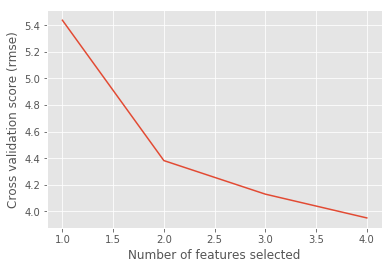

In [152]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (rmse)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), np.sqrt(np.abs(rfecv.grid_scores_)))
plt.show()

In [153]:
lin_ranks = [ranking for ranking in zip(rfecv.ranking_, poverty_X.columns)]
lin_ranks
# sorted(lin_ranks)[70:]

[(1, 'demo__pct_adults_less_than_a_high_school_diploma'),
 (1, 'econ__pct_civilian_labor'),
 (1, 'health__homicides_per_100k'),
 (1, 'econ__pct_unemployment')]

### AdaBoostRegressor

In [154]:
cachedir = mkdtemp()
estimators = [('reg_model', LinearRegression())]
regr_pipe = Pipeline(estimators, memory=cachedir)

In [155]:
# adaReg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=25, splitter='random', criterion='mse'
#                                                 , min_samples_split=0.015, min_samples_leaf=0.005
#                                                  , min_impurity_decrease=0.2)
#                            , n_estimators=600, loss='exponential', learning_rate=0.75, random_state=rng)

# adaReg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=17, splitter='random', criterion='mse'
#                                                 , min_samples_split=0.025, min_samples_leaf=0.01
#                                                  , min_impurity_decrease=0.2, random_state=rng)
#                            , n_estimators=600, loss='linear', learning_rate=0.75, random_state=rng)

adaReg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=13, splitter='random', criterion='mse'
                                                , random_state=rng)
                           , n_estimators=600, loss='linear', learning_rate=1, random_state=rng)

In [156]:
param_grid = dict(reg_model=[rfecv, adaReg])

In [157]:
reg_grid = GridSearchCV(estimator=regr_pipe, param_grid=param_grid, scoring=scoring, cv=inner_cv
                        , error_score=0, refit='mse')
reg_pred = reg_grid.fit(poverty_X, poverty_y)
reg_pred.best_estimator_

Pipeline(memory='/var/folders/_j/vyb4dyfx2wq850vj9vh25wy40000gn/T/tmp0rxqetqg',
     steps=[('reg_model', AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=13, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0....oss='linear', n_estimators=600,
         random_state=<mtrand.RandomState object at 0x1a2aa0b5e8>))])

In [158]:
train_scores = cross_validate(reg_grid, poverty_X, poverty_y, cv=outer_cv, scoring=scoring, return_train_score=True)
pprint(np.average(np.abs(train_scores['test_r2'])))
pprint(np.average(np.sqrt(np.abs(train_scores['test_mse']))))

0.72172610525021019
3.5489587214007741


2f: 0.59474874218836893 and 4.2826893135905291 <br>

### Feature Selection
To improve the AdaBoostRegressor even more, the best features are selected using recursive feature elimination or backwards elimination.

In [597]:
mse = make_scorer(mean_squared_error, greater_is_better=False)

rfecv = RFECV(estimator=adaReg, step=1, cv=inner_cv, scoring=mse)

rfecv.fit(poverty_X, poverty_y)

print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 78


In [ ]:
train_scores = cross_validate(rfecv, poverty_X, poverty_y, cv=outer_cv, scoring=scoring, return_train_score=True)
pprint(np.average(np.abs(train_scores['test_r2'])))
pprint(np.average(np.sqrt(np.abs(train_scores['test_mse']))))

score1: 

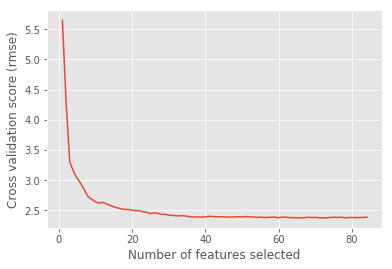

In [599]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (rmse)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), np.sqrt(np.abs(rfecv.grid_scores_)))
plt.show()

In [ ]:
ada_ranks = [ranking for ranking in zip(rfecv.ranking_, poverty_X.columns)]
sorted(lin_ranks)[78:]

### Analysis of Predictions and Residuals
The Analysis of the quality of the predictions and residuals shows that the accuracy of the AdaBoostRegressor is  high: the AdaBoostRegressor overfits the data.

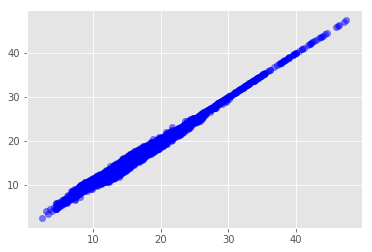

In [600]:
sc1_tmp = plt.scatter(poverty_y, reg_grid.predict(poverty_X), c='b', s=40, alpha=0.5)

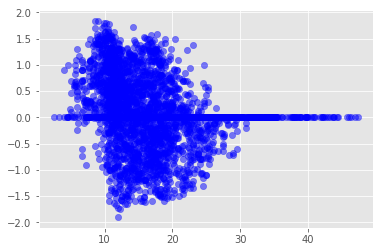

In [601]:
sc2_tmp = plt.scatter(reg_grid.predict(poverty_X), reg_grid.predict(poverty_X) - poverty_y, c='b', s=40, alpha=0.5)

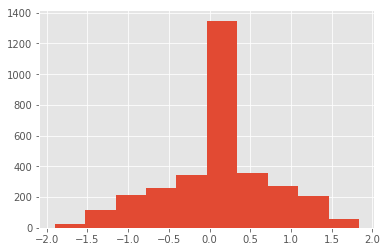

In [602]:
residuals = reg_grid.predict(poverty_X) - poverty_y
residuals = residuals.rename('residuals')
ht_tmp = residuals.hist()

## Test

In [ ]:
poverty_test = pd.read_csv('./Microsoft_-_DAT102x_Predicting_Poverty_in_the_United_States_-_Test_values.csv')

In [ ]:
poverty_test.shape

In [ ]:
#Create Features
poverty_test = create_features(poverty_test)

#Convert to correct type
poverty_test = convert_to_cat(poverty_test)

#Drop Features
poverty_row_id = poverty_test.row_id
poverty_test = drop_features(poverty_test)
poverty_test = poverty_test.drop(columns=['row_id'], axis=1)

#Replace NANs
poverty_test_clean = poverty_test.fillna(poverty_test.mean())
poverty_test_clean = cat_to_dummies(poverty_test_clean)

#Scale Features
poverty_test_clean = scale_features(poverty_test_clean)

In [ ]:
poverty_test_clean.shape

In [ ]:
#Create Prediction
submission = pd.DataFrame(reg_grid.predict(poverty_test_clean))
submission = np.clip(submission,0.00,100.00)
submission.shape

In [ ]:
poverty_submission = pd.concat([poverty_row_id, submission], axis=1)
poverty_submission = poverty_submission.rename(index=str, columns={0: 'poverty_rate'})
poverty_submission = poverty_submission.round({'poverty_rate':2})

In [ ]:
poverty_submission.head()

In [ ]:
poverty_submission.shape

In [ ]:
poverty_submission.to_csv(path_or_buf='./MV_Poverty_Submission_AdaReg_SbS.csv', index=False)

## Conclusion

The Regression analysis shows that is possible to build an accurate regression model to predict poverty rates of United States' counties using an AdaBoostRegressor. From the data exploration phase it is clear that economical, educational, ethnical and health related factors play an important role in predicting poverty.